# Final Project Submission

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

<img src="cryptoimage.jpeg">

Cyrptocurrencies have grown in popularity and market capitalization as corporations, retail investors, and individual adopt them as means of transactions and as a store of value. Bitcoin, introduced to the world in 2008 was the first cryptocurrency and still the largest as a percentage of market share. However, Ethereum and a host of other coins have been making their way into the mainstream. 

One of the primary concerns that regulators and investors hold is their association with malicious activity. Because transactions are anonymous and decentralized, they became useful for purchasing goods and services on dark web markets like Silk Road. With anonymous transactions came fraud. Since users can't verify who is on the other end of the transaction, people are regularly 'scammed' and defrauded. For widespread adoption, this poses a major concern. 

Crypto fraud usually presents itself in a couple of ways. First, when a user makes a transaction on an exchange, they must connect their wallet. If the exchange is hacked, all of the wallets are at risk. This is what happened with Mt. Gox, the largest cyrpto hack of all time. This hack involved 850,000 BTC valued today at ~ 45 billion dollars. Crypto fraud also presents itself in ficticious projects. Founders design projects and raise funds from investors. Many times, these projects end up being fake the founders route money into their own wallets. 

The model I have designed adds a safeguard for transferring ethereum. If the model believs the transaction may be fraudelent, it will warn the user before they confirm the transaction. This is similar to your bank sending out a warning that your credit card may have been used for unverified transactions. Ideally, this service would be built into an existing cryptocurrency wallet. 

- https://en.wikipedia.org/wiki/Mt._Gox
- https://www.forbes.com/sites/jeffkauflin/2018/10/29/where-did-the-money-go-inside-the-big-crypto-icos-of-2017/?sh=7a1267cb261b

# OBTAIN

In [1]:
# Load in the data from Kaggle
# https://www.kaggle.com/vagifa/ethereum-frauddetection-dataset

import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('transaction_dataset.csv')

In [2]:
# Make sure it was loaded correctly

display(df.shape)
df.head()

(9841, 51)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421896,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


Here is a description of the columns of the dataset:

- Index: the index number of a row

- Address: the address of the ethereum account

- FLAG: whether the transaction is fraud or not

- Avg min between sent tnx: Average time between sent transactions for account in minutes

- Avgminbetweenreceivedtnx: Average time between received transactions for account in minutes

- TimeDiffbetweenfirstand_last(Mins): Time difference between the first and last transaction

- Sent_tnx: Total number of sent normal transactions

- Received_tnx: Total number of received normal transactions

- NumberofCreated_Contracts: Total Number of created contract transactions

- UniqueReceivedFrom_Addresses: Total Unique addresses from which account received transactions

- UniqueSentTo_Addresses20: Total Unique addresses from which account sent transactions

- MinValueReceived: Minimum value in Ether ever received

- MaxValueReceived: Maximum value in Ether ever received

- AvgValueReceived5Average value in Ether ever received

- MinValSent: Minimum value of Ether ever sent

- MaxValSent: Maximum value of Ether ever sent

- AvgValSent: Average value of Ether ever sent

- MinValueSentToContract: Minimum value of Ether sent to a contract

- MaxValueSentToContract: Maximum value of Ether sent to a contract

- AvgValueSentToContract: Average value of Ether sent to contracts

- TotalTransactions(IncludingTnxtoCreate_Contract): Total number of transactions

- TotalEtherSent:Total Ether sent for account address

- TotalEtherReceived: Total Ether received for account address

- TotalEtherSent_Contracts: Total Ether sent to Contract addresses

- TotalEtherBalance: Total Ether Balance following enacted transactions

- TotalERC20Tnxs: Total number of ERC20 token transfer transactions

- ERC20TotalEther_Received: Total ERC20 token received transactions in Ether

- ERC20TotalEther_Sent: Total ERC20token sent transactions in Ether

- ERC20TotalEtherSentContract: Total ERC20 token transfer to other contracts in Ether

- ERC20UniqSent_Addr: Number of ERC20 token transactions sent to Unique account addresses

- ERC20UniqRec_Addr: Number of ERC20 token transactions received from Unique addresses

- ERC20UniqRecContractAddr: Number of ERC20token transactions received from Unique contract addresses

- ERC20AvgTimeBetweenSent_Tnx: Average time between ERC20 token sent transactions in minutes

- ERC20AvgTimeBetweenRec_Tnx: Average time between ERC20 token received transactions in minutes

- ERC20AvgTimeBetweenContract_Tnx: Average time ERC20 token between sent token transactions

- ERC20MinVal_Rec: Minimum value in Ether received from ERC20 token transactions for account

- ERC20MaxVal_Rec: Maximum value in Ether received from ERC20 token transactions for account

- ERC20AvgVal_Rec: Average value in Ether received from ERC20 token transactions for account

- ERC20MinVal_Sent: Minimum value in Ether sent from ERC20 token transactions for account

- ERC20MaxVal_Sent: Maximum value in Ether sent from ERC20 token transactions for account

- ERC20AvgVal_Sent: Average value in Ether sent from ERC20 token transactions for account

- ERC20UniqSentTokenName: Number of Unique ERC20 tokens transferred

- ERC20UniqRecTokenName: Number of Unique ERC20 tokens received

- ERC20MostSentTokenType: Most sent token for account via ERC20 transaction

- ERC20MostRecTokenType: Most received token for account via ERC20 transactions

**Fraud**
- Interpreting fraud as the wallet user has reported a fraudulent transaction at least once

In [3]:
# Replace spaces with underscores on column names to make it more 'pythonic'

df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.replace(' ', '_')

In [4]:
df.columns

Index(['Unnamed:_0', 'Index', 'Address', 'FLAG', 'Avg_min_between_sent_tnx',
       'Avg_min_between_received_tnx',
       'Time_Diff_between_first_and_last_(Mins)', 'Sent_tnx', 'Received_Tnx',
       'Number_of_Created_Contracts', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received_',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions_(including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'Total_ERC20_tnxs',
       'ERC20_total_Ether_received', 'ERC20_total_ether_sent',
       'ERC20_total_Ether_sent_contract', 'ERC20_uniq_sent_addr',
       'ERC20_uniq_rec_addr', 'ERC20_uniq_sent_addr.1',
       'ERC20_uniq_rec_contract_addr', 'ERC20_avg_time_between_sent_tnx',
       'ERC20_avg_time_b

In [5]:
df.head()

,Unnamed:_0,Index,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,min_value_sent_to_contract,max_val_sent_to_contract,avg_value_sent_to_contract,total_transactions_(including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_sent_contracts,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_sent_addr.1,ERC20_uniq_rec_contract_addr,ERC20_avg_time_between_sent_tnx,ERC20_avg_time_between_rec_tnx,ERC20_avg_time_between_rec_2_tnx,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421896,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [6]:
# Check for columns that have a low number of unique values

df.nunique()

Unnamed:_0                                              9841
Index                                                   4729
Address                                                 9816
FLAG                                                       2
Avg_min_between_sent_tnx                                5013
Avg_min_between_received_tnx                            6223
Time_Diff_between_first_and_last_(Mins)                 7810
Sent_tnx                                                 641
Received_Tnx                                             727
Number_of_Created_Contracts                               20
Unique_Received_From_Addresses                           256
Unique_Sent_To_Addresses                                 258
min_value_received                                      4589
max_value_received_                                     6302
avg_val_received                                        6767
min_val_sent                                            4719
max_val_sent            

- Columns with a low number of values may have low variance which makes them less useful for classifcation models

In [7]:
# Drop unnecessary columns

cols_to_drop = ['Unnamed:_0', 'Index', 'ERC20_uniq_sent_addr.1', 'ERC20_avg_time_between_rec_2_tnx',
               'Number_of_Created_Contracts', 'min_value_sent_to_contract', 'max_val_sent_to_contract',
               'avg_value_sent_to_contract', 'total_ether_sent_contracts', 'ERC20_total_Ether_sent_contract',
               'ERC20_uniq_sent_addr.1', 'ERC20_avg_time_between_sent_tnx', 'ERC20_avg_time_between_rec_tnx',
               'ERC20_avg_time_between_rec_2_tnx', 'ERC20_avg_time_between_contract_tnx', 
               'ERC20_min_val_sent_contract','ERC20_max_val_sent_contract', 'ERC20_avg_val_sent_contract'
               ]
df = df.drop(columns=cols_to_drop, axis=1)

- Dropping columns that are accidentally repeated
- Dropping columns that only have 1 value but should have more. Attributing this to errors during data collection (continuous numeric data should not only have 1 columns)
- Columns that only contain one variable and are uniform accross the data do not add information for modeling

In [8]:
# Clean up column names by removing parenthesis

df = df.rename(columns={'total_transactions_(including_tnx_to_create_contract':'Total_tnx', 'Time_Diff_between_first_and_last_(Mins)':'Time_diff_first_last'})

# SCRUB

## Check for duplicate values

In [9]:
# Check for complete duplicates

df.duplicated().sum()

18

In [10]:
df[df.duplicated(keep=False)]

,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_diff_first_last,Sent_tnx,Received_Tnx,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,Total_tnx,total_Ether_sent,total_ether_received,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_rec_contract_addr,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
2908,0x4c13f6966dc24c92489344f0fd6f0e61f3489b84,0,5980.35,18633.46,498256.47,21,20,2,18,1.990000,499.990000,129.970060,0.000669,499.989580,123.780506,41,2599.390622,2599.401197,0.010575,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0,0
2909,0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1,0,7042.64,2694.86,80594.87,8,9,8,7,0.001000,2.812069,0.880369,0.000000,2.060330,0.989884,17,7.919068,7.923318,0.004250,3.0,1.404019e+02,1.401027e+02,1.0,2.0,2.0,0.299173,1.401027e+02,70.200930,140.102687,1.401027e+02,140.102687,1.0,2.0,Golem,OmiseGO
2911,0x4c268c7b1d51b369153d6f1f28c61b15f0e17746,0,0.00,0.00,0.00,0,1,1,0,0.250303,0.250303,0.250303,0.000000,0.000000,0.000000,1,0.000000,0.250303,0.250303,5.0,7.221897e+01,0.000000e+00,0.0,5.0,5.0,0.000000,6.492189e+01,14.443795,0.000000,0.000000e+00,0.000000,0.0,5.0,None,Livepeer Token
2912,0x4c26a3c12a64f33a3546fbb206c5365ce8e82c20,0,0.00,0.00,0.00,0,1,1,0,0.804725,0.804725,0.804725,0.000000,0.000000,0.000000,1,0.000000,0.804725,0.804725,5.0,1.900557e+02,0.000000e+00,0.0,5.0,5.0,0.000000,1.715882e+02,38.011146,0.000000,0.000000e+00,0.000000,0.0,5.0,None,Livepeer Token
2914,0x4c27438a77738153f6cf3ed890b2817d52ebf584,0,9695.78,1133.48,257022.97,14,107,6,1,1.027784,278.228000,62.635543,0.008543,2582.449433,478.714007,121,6701.996102,6702.003081,0.006979,1.0,6.000000e+02,0.000000e+00,0.0,1.0,1.0,600.000000,6.000000e+02,600.000000,0.000000,0.000000e+00,0.000000,0.0,1.0,None,AICRYPTO
2915,0x4c391cc032c9107b596267610a05262c90fc2df7,0,161.24,0.92,324.32,2,2,2,2,3.662241,97.337759,50.500000,1.499454,99.499562,50.499508,4,100.999016,101.000000,0.000984,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0,0
2916,0x4c4a03e100b4b104355edc4c50ce12b9a2879547,0,6783.50,48019.41,1028223.27,10,20,7,2,0.000300,56.488945,19.423552,0.000000,156.470945,38.846694,30,388.466945,388.471045,0.004100,2.0,8.839541e-01,8.839541e-01,1.0,1.0,1.0,0.883954,8.839540e-01,0.883954,0.883954,8.839540e-01,0.883954,1.0,1.0,OmiseGO,OmiseGO
2917,0x4c4da560350e302232a184c8fa16b126a772c326,0,0.00,0.00,5.70,1,1,1,1,0.082618,0.082618,0.082618,0.082147,0.082147,0.082147,2,0.082147,0.082618,0.000472,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0,0
2918,0x4c5b0709f66719861e7277c9dcda9175deb3d866,0,2.32,0.07,9.42,4,2,2,4,517.428338,1483.571662,1000.500000,0.001078,1452.455404,500.249528,6,2000.998113,2001.000000,0.001887,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0,0
2922,0x4c7f6d5b287054bf41f9d49ea8d2ca6e6837850b,0,4.72,0.00,28.30,6,1,1,3,1.500000,1.500000,1.500000,0.000000,1.420000,0.320956,7,1.925735,1.500000,-0.425735,2.0,1.500000e+01,1.500000e+01,1.0,1.0,1.0,15.000000,1.500000e+01,15.000000,15.000000,1.500000e+01,15.000000,1.0,1.0,Veritaseum,Veritaseum


There are 18 full duplicates. Going to assume this was an error so will delete the 'last' version of the duplicate. They are all flagged as non-fraud

In [11]:
# Drop full duplicate values

df = df.drop_duplicates()

In [12]:
# Make sure there are no duplicate values left

df.duplicated().sum()

0

Since address must be unique, ensure that there are no duplicate address values

In [13]:
df[df.duplicated(subset=['Address'], keep=False) ]

,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_diff_first_last,Sent_tnx,Received_Tnx,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,Total_tnx,total_Ether_sent,total_ether_received,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_rec_contract_addr,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
2910,0x4c24af967901ec87a6644eb1ef42b680f58e67f5,0,3098.05,4755.44,382590.08,36,57,2,2,0.098677,1.021210,0.417608,0.098234,3.061040,0.660712,93,23.785623,23.803631,0.018009,3.0,2.255417e+02,0.00000,0.0,3.0,3.0,0.000000,2.050453e+02,75.180566,0.00000,0.0,0.00000,0.0,3.0,None,INS Promo
2913,0x4c271764eadcf0d07e5a937b2de290294c9d11c2,0,0.00,4695.70,319307.70,0,68,5,0,0.000000,1.001958,0.582851,0.000000,0.000000,0.000000,69,0.000000,39.633843,39.633843,2.0,1.332144e+00,0.00000,0.0,2.0,2.0,0.489173,8.429710e-01,0.666072,0.00000,0.0,0.00000,0.0,2.0,None,DATAcoin
2919,0x4c7520df888aa4569a37ac7d132f89c65821f0af,0,0.00,125704.72,628523.60,0,5,5,0,0.008496,1.500000,0.580704,0.000000,0.000000,0.000000,5,0.000000,2.903522,2.903522,7.0,4.576503e+02,0.00000,0.0,6.0,7.0,0.000000,3.957979e+02,65.378619,0.00000,0.0,0.00000,0.0,7.0,None,XENON
2920,0x4c77f6b01da78d053d5885e43bce5239b623dd3e,0,88542.07,8570.37,619849.82,4,31,14,2,2.000000,236.000000,48.003226,1.801281,1453.608300,372.023677,35,1488.094708,1488.100000,0.005292,9.0,8.174496e+02,0.00000,0.0,8.0,9.0,0.000000,6.000000e+02,90.827739,0.00000,0.0,0.00000,0.0,9.0,None,Livepeer Token
2921,0x4c7accc2689708892be29256fbe9d45a92f0aa97,0,1698.92,2127.67,793491.68,40,341,9,6,0.002000,2.779804,0.859973,0.000000,26.389848,7.330780,381,293.231188,293.250828,0.019641,12.0,2.248844e+04,100.77336,2.0,8.0,10.0,0.000000,2.007100e+04,2248.843592,0.77336,100.0,50.38668,2.0,10.0,OmiseGO,XENON
2924,0x4cad652b71519a7a68d05dada31122c4c9a5ed95,0,71349.06,14955.28,803222.32,10,6,4,8,0.001405,4.523699,1.643651,0.000000,2.163409,0.928332,16,9.283324,9.861906,0.578583,12.0,1.786914e+04,5196.00000,3.0,5.0,7.0,0.000000,4.853136e+03,1985.459570,0.00000,4920.0,1732.00000,3.0,5.0,Dao.Casino,Dao.Casino
2926,0x4cb981a7a2956cdfa8afbf454cb4e1b13c69aeb9,0,0.00,14218.10,412324.93,0,29,1,0,9.990000,40.000000,23.724138,0.000000,0.000000,0.000000,29,0.000000,688.000000,688.000000,21.0,4.598776e+06,0.00000,0.0,17.0,21.0,0.000000,4.590000e+06,218989.342600,0.00000,0.0,0.00000,0.0,21.0,None,Livepeer Token
2935,0x4c24af967901ec87a6644eb1ef42b680f58e67f5,0,3098.05,4755.44,382590.08,36,57,2,2,0.098677,1.021210,0.417608,0.098234,3.061040,0.660712,93,23.785623,23.803631,0.018009,3.0,2.255417e+02,0.00000,0.0,3.0,3.0,0.000000,2.050453e+02,75.180566,0.00000,0.0,0.00000,0.0,3.0,None,VIU
2938,0x4c271764eadcf0d07e5a937b2de290294c9d11c2,0,0.00,4695.70,319307.70,0,68,5,0,0.000000,1.001958,0.582851,0.000000,0.000000,0.000000,69,0.000000,39.633843,39.633843,2.0,1.332144e+00,0.00000,0.0,2.0,2.0,0.489173,8.429710e-01,0.666072,0.00000,0.0,0.00000,0.0,2.0,None,OmiseGO
2944,0x4c7520df888aa4569a37ac7d132f89c65821f0af,0,0.00,125704.72,628523.60,0,5,5,0,0.008496,1.500000,0.580704,0.000000,0.000000,0.000000,5,0.000000,2.903522,2.903522,7.0,4.576503e+02,0.00000,0.0,6.0,7.0,0.000000,3.957979e+02,65.378619,0.00000,0.0,0.00000,0.0,7.0,None,Livepeer Token


Only difference is the ERC20 most sent token type and ERC2 most rec token type. They are all non-fraud accounts. Every address is unique and there is no way of certifying which address has the correct information. Rather than randomly choosing to drop one set (7 duplicates), going to drop all of them.

In [14]:
df = df.drop_duplicates(subset='Address')

In [15]:
# Make sure there are no duplicate addresses

df.duplicated(subset='Address').sum()

0

## Check for Null Values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9816 entries, 0 to 9840
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Address                         9816 non-null   object 
 1   FLAG                            9816 non-null   int64  
 2   Avg_min_between_sent_tnx        9816 non-null   float64
 3   Avg_min_between_received_tnx    9816 non-null   float64
 4   Time_diff_first_last            9816 non-null   float64
 5   Sent_tnx                        9816 non-null   int64  
 6   Received_Tnx                    9816 non-null   int64  
 7   Unique_Received_From_Addresses  9816 non-null   int64  
 8   Unique_Sent_To_Addresses        9816 non-null   int64  
 9   min_value_received              9816 non-null   float64
 10  max_value_received_             9816 non-null   float64
 11  avg_val_received                9816 non-null   float64
 12  min_val_sent                    98

All of th ERC20 columns are missing aprox. 829 values. The first 24 columns which are only focused on ethereum do not contain any null values. 

Will also have to inspect if there are placeholder values for null values

<AxesSubplot:>

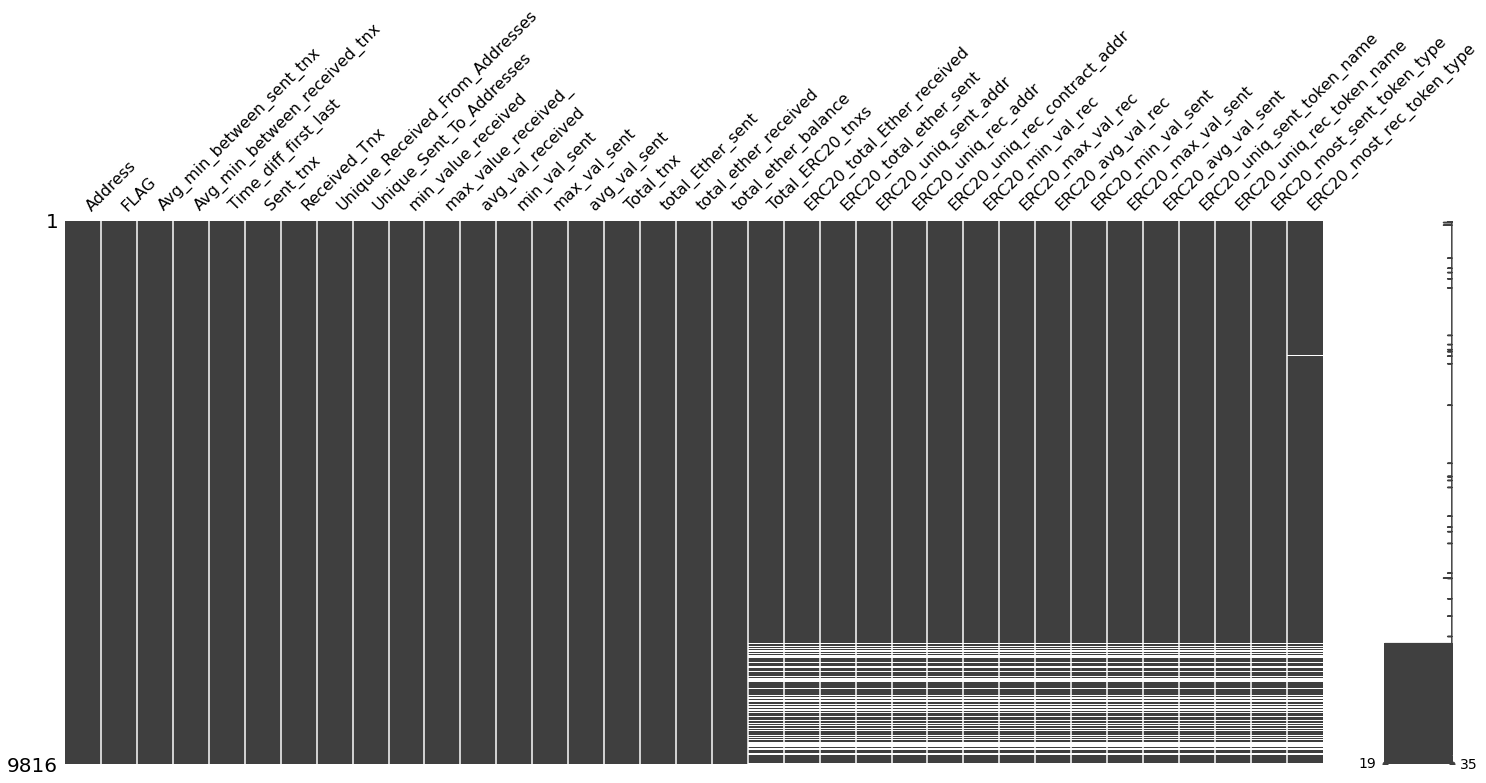

In [17]:
import missingno as msno
msno.matrix(df)

Most of the columns are completely filled in but the ERC tokens all contain null values in the same area. This makes me believe that fraudalent values may systematically be missing. Since they are not missing completely at random, will fill them in with a 'missing' value to indicate that they are missing and possibly uncover a pattern

<AxesSubplot:>

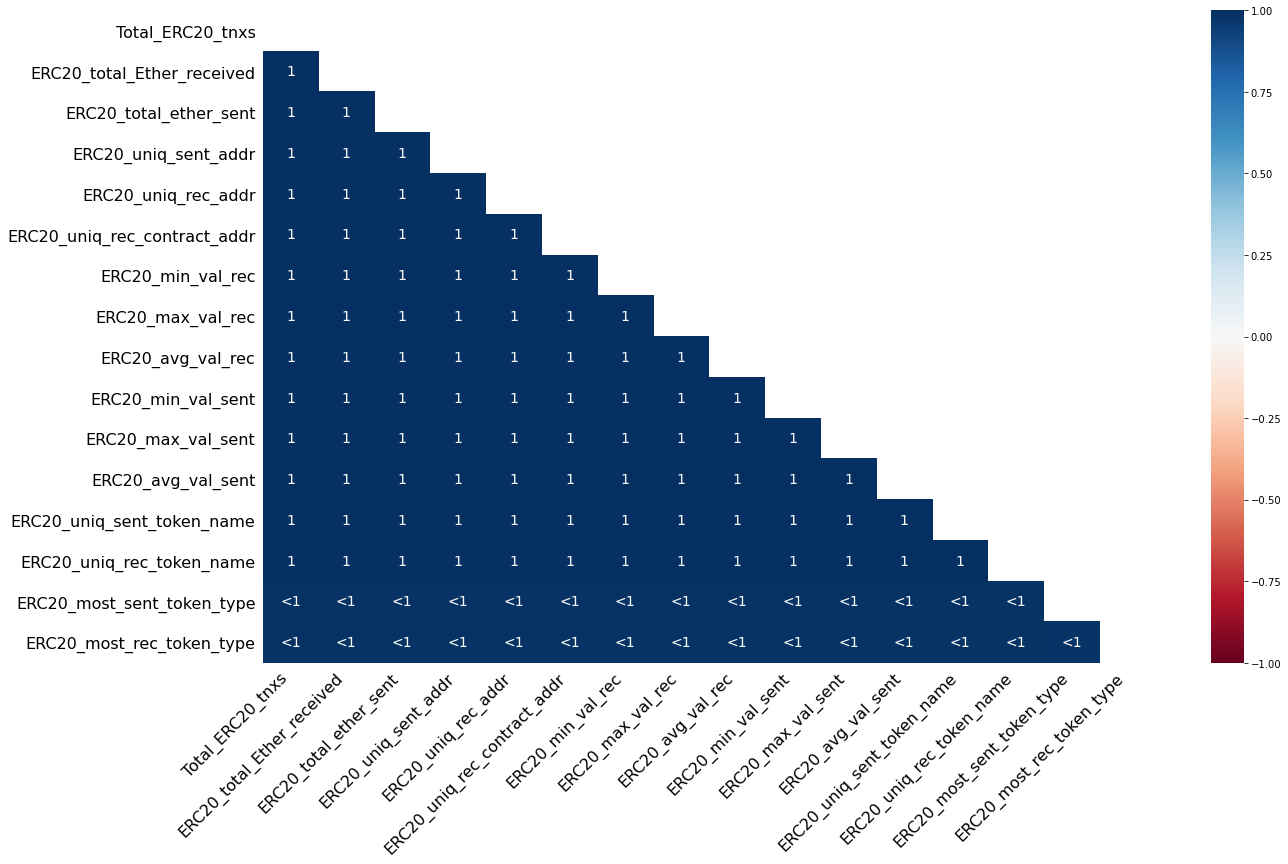

In [18]:
msno.heatmap(df)

The perfect correlation confirms that if one ERC value is missing, all of them will be classified as missing

In [19]:
# Check where in the dataset missing values appear

missing=list(df[df['FLAG']==1].index)

In [20]:
import numpy as np
np.array(missing)
print(np.min(missing))
np.max(missing)

7662


9840

It is clear based on the matrix that the fraud instances are consecutive and correspond with the missing ERC values. 

It makes sense that many of the fraud cases are missing values because a user may have had their account hacked and not been aware of transaction being made. For example, if a user connected their wallet to an exchange that was hacked they may not know where the transactions were sent

In [21]:
df_missing = df[df['FLAG']==1]

<AxesSubplot:>

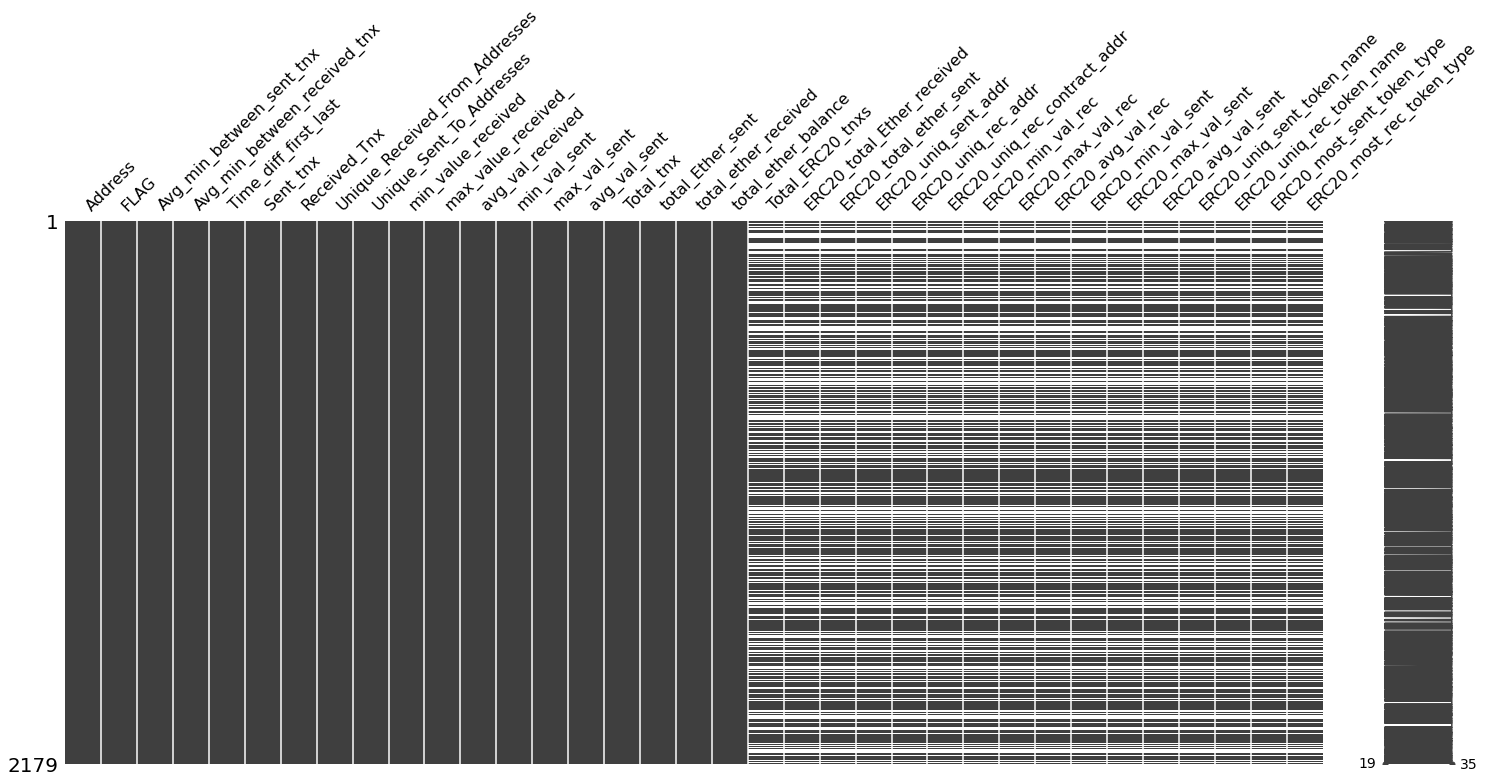

In [22]:
msno.matrix(df_missing)

In [23]:
df_missing.isna().sum()

Address                             0
FLAG                                0
Avg_min_between_sent_tnx            0
Avg_min_between_received_tnx        0
Time_diff_first_last                0
Sent_tnx                            0
Received_Tnx                        0
Unique_Received_From_Addresses      0
Unique_Sent_To_Addresses            0
min_value_received                  0
max_value_received_                 0
avg_val_received                    0
min_val_sent                        0
max_val_sent                        0
avg_val_sent                        0
Total_tnx                           0
total_Ether_sent                    0
total_ether_received                0
total_ether_balance                 0
Total_ERC20_tnxs                  829
ERC20_total_Ether_received        829
ERC20_total_ether_sent            829
ERC20_uniq_sent_addr              829
ERC20_uniq_rec_addr               829
ERC20_uniq_rec_contract_addr      829
ERC20_min_val_rec                 829
ERC20_max_va

Confirm that the missing ERC20 values are in the fraud portion of the dataset

In [24]:
# How many ERC values are missing

829/len(df_missing)

0.38044974759063793

Going to classify missing ERC values as 'missing' to demonstrate that they have meaning. Missing ERC value means the user does not know the specifics of their transactions. 

About 40% of the fraudulent cases contain missing ERC20 information

In [25]:
df['erc_missing'] = df.loc[:,'Total_ERC20_tnxs':'ERC20_avg_val_sent'].isna().any(axis=1)

In [26]:
df['erc_missing'].value_counts()

False    8987
True      829
Name: erc_missing, dtype: int64

There is a now a column that denotes 'missing' if ERC values are null. It appears that in many of the fraud cases, ERC20 token information is missing. If the wallent was hacked, the user may be unaware of the transaction being made which is why the data is missing. 

In [27]:
# Turn into numeric variable so it can be processed by sklearn

df['erc_missing'] = df['erc_missing'].map({False:0,
                       True:1})

In [28]:
df['erc_missing'].value_counts()

0    8987
1     829
Name: erc_missing, dtype: int64

## Feature Engineering

An example of fraud could be a bad actor gaining access to your wallet and sending the balance or certain number of tokens to their own wallet. Characteristics of this may look like: 
- Significantly larger max_val_sent than avg_val_sent because the hacker was flushing out their entire account in one swoop
- Lower market cap ERC20 tokens are more likely to result in crypto scams (ie ICO bubble in 2017)

### Organizing Tokens by MarketCap

- Name of the token does not provide additional values and it will be impossible to OHE names of tokens based on cardinality of most recieved and most sent ERC coins (527 unique coins)
- Cross reference coingecko to retrieve market cap for respective coins
    - Marketcap: Current Price * # of Coins in circulation
- 1 denotes coin that does not have a listed market cap
    - Using 1 as opposed to 0 because 0 means that the wallet does not trade any ERC20 coins, 1 represents that the user does trade ERC20 tokens they are just very low market cap coins


Source: https://www.coingecko.com/en

In [29]:
# List of unique received tokens

df['ERC20_most_rec_token_type'].unique()

array(['Numeraire', 'Livepeer Token', 'XENON', 'EOS', '0', 'AICRYPTO',
       'DATAcoin', 'PoSToken', 'KyberNetwork', 'None', 'Bancor',
       'OmiseGO', 'ONOT', 'Tronix', 'StatusNetwork',
       'SAFE.AD - 20% DISCOUNT UNTIL 1 MAY', nan, 'Storj', 'bitqy',
       'Beauty Coin', 'SONM', 'NEVERDIE', 'INS Promo', 'TenXPay',
       'Cybereits Token', 'FunFair', 'DGD', 'iEx.ec Network Token',
       'AION', 'Aragon', 'Cofoundit', 'Golem', 'CRYPTOPUNKS', 'Nitro',
       'Ether Token', 'VeChain', 'Reputation', 'Intelion', 'Dochain',
       'SwarmCity', 'BAT', 'LockTrip', 'Humaniq', 'KickCoin', 'BOX Token',
       'MobileGo', 'Monaco', 'Azbit', 'Nexium', 'ZGC', 'www.pnztrust.com',
       'Send your ETH to this contract and earn 2.55% every day for Live-long. https://255eth.club',
       'empowr', 'An Etheal Promo', 'BitClave', 'Bytom',
       'Identity Hub Token', 'Celsius', 'Raiden', 'Trustcoin', 'ARP',
       'Qtum', 'Poker Chips', 'Loopring', 'Penta Network Token', 'Salt',
       'ICONOMI',

In [30]:
# Marketcap sourced from CoinGecko

token_rec_dict = {'Numeraire':330000000, 'Livepeer Token':809000000, 'XENON':1, 'EOS':10373000000,
              'AICRYPTO': 1, 'DATAcoin': 19000, 'PoSToken':1, 'KyberNetwork':1, 'Bancor':1460000000,
       'OmiseGO':1, 'ONOT':1, 'Tronix':1, 'StatusNetwork':624000000, 'Storj':253000000, 'bitqy':1,
       'Beauty Coin':1, 'SONM':201000000, 'NEVERDIE':1, 'INS Promo':1, 'TenXPay':15000000,
       'Cybereits Token':1, 'FunFair':1, 'DGD':72000000, 'iEx.ec Network Token':706000000,
       'AION':211000000, 'Aragon':288000000, 'Cofoundit':1, 'Golem':415000000, 'CRYPTOPUNKS':1, 'Nitro':1,
       'VeChain':11920000000, 'Reputation':1, 'Intelion':1, 'Dochain':1,
       'SwarmCity':720000, 'BAT':1780000000, 'LockTrip':152000000, 'Humaniq':2265000, 'KickCoin':1,
        'BOX Token':1687000,'MobileGo':1630000, 'Monaco':205000000, 'Azbit':1, 'Nexium':1, 
        'ZGC':1, 'empowr':1, 'BitClave':1, 'Bytom':321000000,
        'Celsius': 2760000000, 'Raiden': 53000000, 'Trustcoin':1, 'ARP':1,
       'Qtum':2205000000, 'Poker Chips':1, 'Loopring':751000000, 'Penta Network Token':3700000,
        'Salt':55000000,'ICONOMI':1, 'Edgeless':890000, 'BitCAD':1, 'SAN':18000000, 'iDAG SPACE':1,
        'Telcoin':2200000000, 'Poker IO':1, 'HuobiToken':6012000000, 'DICE':1, 'Polybius':1,
        'Kin':209400000, 'Tokenomy':7600000,'Hut34 Entropy':1, 'DMTS':1, 'MT Token':5644114,
        'Testamint':1, 'Bulleon Promo Token':11600,
       'Time New Bank':18000000, 'TokenCard':1, 'BPTN':1, 'Super Wallet Token':1,
       'SNGLS':16000000, 'BlockchainPoland':1,'Oyster Pearl':1, 'WisePlat Token':1,
       'ethBo':1,'Delphy Token':1132164, 'BlitzPredict':781000,
       'Pundi X Token':628000000, 'Stox':825000,'DragonGameCoin':1, 'OWN':1700000, 'Populous':133891098,
        'Veritaseum':46000000, 'UG Token':1, 'Soarcoin':4600000, 'LGO':63000000,
        'FinShi Capital Tokens':1, 'Melon':1, 'Delta':15000000,
       'More Gold Coin':1, 'Aeternity':118000000, 'TAAS':1, 'TzLibre Token':1,
       'StatusGenesis':668000000, 'AnyCoinVer10':1,
       'CANDY':195000, 'OpenANX':1, 'MKRWrapper':1, 'minereum':1, 'UnityIngot':1,
       'CYRUS':1, 'Aurora':16000000, 'Amber':1, 'WAX Token':1, 'Upfiring':3000000,
       'district0x':2100000000, 'Global ICO Token':1, 'MEX':1, 'Centra':1, 'DALECOIN':36000,
       'IGNITE':1, 'Carrots':1, 'Dentacoin':51000000, 'Dao.Casino':1, 'BCShareS':1,
       'Coineal Token':600000, 'IOT Chain':13000000, 'Brickblock':1, 'TOKOK':165000, 'Fair Token':1,
       'AirCoin':1, 'BMB':1, 'Guppy':260000000, 'DMarket':50000000, 'TrueUSD':1200000000, 'PILLAR':18000000,
       'Yooba token':1, 'Musiconomi':1, 'WFee':1, 'ZEON':1, 'TIME':11000000,
       'Live Stars Token':1, 'vSlice':165000, 'Cryptonex (CNX)':165000, 'Ink Protocol':1800000,
       'iXledger':1, 'ICON':1308000000, 'OPEN Chain':1, 'Civic':319000000, 'TheDAO':1, 'Walton':54000000,
       'Request':97000000, 'NKN':350000000,'Flyp.me':1, 'RHOC':1, 'MediShares':11000000, 
        'bitqy10':1,'NimiqNetwork':74000000, 'Divi Exchange Token':203000000, 'EnjinCoin':1900000000, 'VIU':1,
       'Patientory':2000000, 'Invox Finance Token':1, 'ZRX':1400000000, 'yocoinclassic':1,
       'Gnosis':385000000, 'Skraps':1, 'DEBITUM':514000,'Bilian':1, 'REP':240000000,
        'Frikandel':1, 'DCORP':1, 'HackerGold':1, 'Bloom':8000000,
       'Pundi X':630000000, 'Kuende Token':1, 'Mysterium':23000000, 'FIFA.win':1,
       'Nebulas':45000000, 'Merculet':7500000, 'WINGS':8700000,
       'QRL':30000000, 'ChangeNOW':1, 'elixor':1, 'Authorship':1, 'VectoraicToken':1,
       'FloodToken':1, 'XCELTOKEN':1, 'FundRequest':1, 'Six Domain Asset':1,
       'Lunyr':1, 'DIW Token':1, 'RLC':703000000, 'Promodl':1, 'Silent Notary Token':1,
       'MKR':4484000000, 'Ethos':1, 'Freyr Coin':1, 'IBCCoin':1, 'Love Chain':1,
       'RAZOOM':1, 'NucleusVision':17000000, 'Insolar':1, 'SanDianZhong':1, 'WaykiCoin':84000000,
       'Credo Token':1, 'Beth':980000, 'Fysical':1, 'GSG coin':1, 'WELL Token':1,
       'ALFA NTOK':1, 'Indorse':1400000, 'CryptoLah':1, 'The Force Token':1,
       'BigBang Game Coin Token':1, 'VIN':1,
       'COPYTRACK':1, 'MATRIX AI Network':13000000, 'Cappasity':1,
       'Yun Planet':1, 'UG Coin':1,'Egretia':16000000, 'BCDN':840000, 'Nectar':15000000, 'Quantum':30000000,
       'Arcona Distribution Contract':1, 'CoinDash':1, 'Cryptonex':1,
       'Zombie X Chain':1, 'Cindicator':58000000, 'ICO':1,
       'EMO tokens':1, 'CVNToken':20000000, 'ESSENTIA':6000000, 'CanYaCoin':7000000,
        '21Million':1, 'shellchains.com':1,
       '0xBitcoin Token':1, 'Unicorns':1, 'CGCOINS':1, 'RCoinVer70':1, 'BNB':9200000000,
       'CGW':1, 'AdEx':135000000, 'Dragon':85000000, 'Covalent Token':1, 'Proof Test':1,
       'PowerLedger':1, 'YouDeal Token':1, 'Bitcoineum':1, 'DJANGO UNCHAIN':1,
       'Genesis Vision':38000000, 'BRAT':1, 'HeroCoin':7000000, 'ArcBlock':19000000, 'DEW':1, 'SGCC':1,
       'SIPC':1, 'MedToken':1, 'MCAP':1, 'Decentraland':1600000000, 'Ethbits':1, 'Etherball':1,
       'Pluton':26000000, 'Zilliqa':2323000000, 'TRUE Token':1, 'FluzFluz':1,
       'Genaro X':14000000, 'CandyHCoin':1, 'YESTERDAY':1, 'InsurePal':353000, 'FirstBlood':1,
       'SingularityNET':346000000, 'FXPay':3700000, 'DRC Token':1, 'ATLANT':1, 'OPEN':11000000,
       'ECHARGE':1, 'Bigbom':265000, 'E4ROW':1, 'IOSToken':1, 'Mothership':8000000,
       'Deprecated':1, 'Atonomi':1, 'VTChain':1, 'Xaurum':1800000, 'Biograffi':1,
       'Primas':2000000, 'TurnGreenToken':1, 'SIGMA':9000000, 'Dignity':1, 'PayPie':6000000,
       'SkinCoin':245000, 'Bi ecology Token':1, 'Substratum':1700000, 'OCoin':1, 'Mavrodi':1,
       'BCG.to':1, 'timereum':1, 'Hiveterminal Token':18000000, 'ABYSS':12000000, 'DAY':1,
       'Trade':1, 'TaTaTu':1, 'QunQunCommunities':7000000, 'LEADCOIN':1, 'PIX':1, 'BSB':1,
       'Gifto':1, 'Wrapped Ether':1, 'Ethmon':1, 'AIT':1, 'Katalyse':1,
       'Republic':1, 'BANKEX':12000, 'ElectrifyAsia':2148000, 'CreditBIT':1, 'Hero Origen':1,
       'CyberVeinToken':1, 'Welcome Coin':1, 'KredX Token':1, 'Relex':1, 'GECoin':1,
       '1irst':1, '$P4C3':1, 'GRID':10844000, 'BTOCoin':1, 'BCT Token':1, 'MINDOL':1,
       'UnikoinGold':384000, 'LuckCash':1, 'Network':1,
       'Covesting':16000000, 'Herocoin':8500000, 'BAI':1, 'Tierion Network Token':32000000,
       'Worldcore':88000, 'KingOfCandy':1,
       'DOG: The Anti-Scam Reward Token':1, 'ZMINE Token':1300000, 'LikeCoin':20000000,
       'Maximine Coin':1, 'BitDegree':1270000, 'Mithril Token':53000000, 'Bitcoin EOS':1,
       'KEY':38000000, 'ViteToken':1, 'Enumivo':1, 'LocalCoinSwap Cryptoshare':1500000,
       'Avocado':1, 'EBCoin':1, 'Storiqa':776000,
       'Cevac Token':1, 'Olive':1, 'ELF':174000000,
       'Fortecoin':1, 'ROOMDAO COIN (RDC)':1, 'Celer Network':295000000,
       'AI Gaming Coin':1, 'ThoreCash':1, 'Cashaa':330000000,
       'FinallyUsableCryptoKarma':1, 'ICTA':1, 'GSENetwork':1500000, 'Lino':1, 'ERC20':4400000,
       'DIGIBYTE':1600000000, 'Helbiz':1, 'Bounty':1, 'Hash Power Token':1,
       'WhalesburgToken':30000, 'CargoX':51000000, 'Signals Network Token':1,
       'BitAir':1, 'Ponder Airdrop Token':1, 'Hms Token':1, 'BAX':52000000, 'GOT':1, 'RvT':600000,
       'Hydro':25000, 'BBN':1, 'Jolly Boots':1, 'OPTin Token':1, 'Everest':65000000,
       'SpherePay':1, 'Polymath':294000000, 'NGOT':223000, 'Monetha':14000000, 'BinaryCoin':1,
       'AppCoins':190000000, 'EtherEcash':1,
       'BUZCOIN':1, 'ABCC invite':1,
       'Energem':1, 'NOAHCOIN':1, 'Electronic Energy Coin':1,
       'ArtisTurba':1, 'Authoreon':1, 'ICE ROCK MINING':1, 'savedroid':267000, 'Metal':214000000,
       'USDDex Stablecoin':1, 'Dropil':1, 'Amplify':1, 'CosmoCoin':1, 'Petroleum':1,
       'Titanium BAR Token':1, 'LendConnect':1, 'BizCoin':1, 'OOOBTCTOKEN':1,
       'Rebellious':1, 'Lendroid Support Token':1, 'USD Coin':16000000000, 'QKC':171000000,
       'TemboCoin':1, 'Crypterium':28000000, 'Snovio':1, 'Galbi':1, 'SinghCoin':1,
       'Matic Network':1, 'Havven':1, 'CyberMiles':18000000, 'WORLD of BATTLES':1,
       'SCAM Stamp Token':1, 'EasyEosToken':1, 'INS Promo1':1}

In [31]:
# Create a set of the most received tokens and find the difference for most sent tokens

rec_set = set(token_rec_dict.keys())
sent_set = set(df['ERC20_most_sent_token_type'].unique())
sent_only = list(sent_set.difference(rec_set))

In [32]:
# Marketcap sourced from CoinGecko
# Added 0

sent_only_dict = {
 'UTRUST':258000000,'Decentralized Application Coin':1,'Happy Coin':1,'DAPSTOKEN':1,'Guaranteed Entrance Token':1,
 'Po.et':698000,'Lucky Token':1,'EduCoin':2700000,'1World':2250000,'Crypto20':181000000,
 'AdBank':5400000,'CultureVirtue':1,'QUBE':1,
 'WePower':21000000,'Everex':19000000,'realchain':1,'DADI':1,'Aeron':410000,'AirToken':1,'WaBi':26000000,
 'WTT':165000,'WIKI Token':290000,'IDICE':1,'Storm':356000000,'Sether':395000,
 'The Token Fund':1,'Trace':876000,'Countinghouse Fund':1,'0xcert Protocol Token':2200000,'Hawala':1,
 'NapoleonX':9800000,'Blackmoon Crypto Token':1,'Fantom Token':1656000000,
 'POWERBANK':1,'Aditus':219000,'ChangeBank':1,'Adshares':7760000,'Monolith TKN':10000000,
 'CCRB':1,'Digix Gold Token':4300000,'Maker':4368000000,'Cobinhood':201000,
 'Measurable Data Token':35000000,'Decent.Bet Token':68000,
 'HOQU Token':1,'Feed':1,'SIRIN':9800000,'QASH':35000000,'AirSwap':58000000,'TrueFlip':3000000,
 'MOT':1,'Vezt':1,'CoinBene Coin':1840000,'dmb.top':1,'WanCoin':1,'Nebula AI Token':1,
 'Identity Hub Token':1,'Aigang':1,'UnlimitedIP Token':13000000,'PRG':1,'300 Token':1,'RUFF':14000000,
 'Blocktix':445000,'FOAM Token':23000000,'Banker Token':1,'SunContract':5600000,'Magna':1,
 'Friendz Coin':1700000,'AVT':6500000, 'Opus':617000,'DRP Utility':1,
 'ARBITRAGE':99000,'CarTaxi':1,'SCAM Seal Token':1,'IDEX Membership':1,'RipioCreditNetwork': 68000000,
 'BMChain Token':1,'BOMB':3000000,'Piggies':1,'Litecoin One':1,'TezosTKN':5138000000,'Cai Token':1,
 'BitDice':1,'Loom':99000000,'ethereumAI Token':1,'eBTC':1,'VIB':16000000,'Enigma':12000000,
 'Propy':81000000,'SeratioCoin':1,'IUNGO':1,'TYT':1,'PangeaCoinICO':1,'Synthetix Network Token':3220000000,
 'ETHWrapper':1,'Bounty0x':732000,'CharterCoin':1, 'CoinBoin':1,'ChainLink Token':18872000000,
 'BANCA':1484000,'BIX Token':1,'Theta Token':1,'DNA':1, '0':0, 0:0}

In [33]:
# https://www.geeksforgeeks.org/python-merging-two-dictionaries/
# Create one dictionary that contains prices for all coins

def Merge(dict1, dict2):
    res = {**dict1, **dict2}
    return res

In [34]:
all_coins = Merge(token_rec_dict, sent_only_dict)

In [35]:
# Turn dictionary into DataFrame to make it easier to evaluate values

series_coins = pd.Series(all_coins)
df_all_coins = pd.DataFrame(series_coins)
df_all_coins = df_all_coins.rename(columns={0:'price'})

In [36]:
df_all_coins.head()

,price
Numeraire,330000000
Livepeer Token,809000000
XENON,1
EOS,10373000000
AICRYPTO,1


In [37]:
pd.options.display.float_format = '{:.5f}'.format

df_all_coins.describe()

,price
count,529.00000
mean,246935794.49149
std,1431097854.20461
min,0.00000
25%,1.00000
50%,1.00000
75%,8500000.00000
max,18872000000.00000


We get a sense that the data is extremely skewed because we have quite a few 1 values and then very large values on the other side of the distribution

Create a system to bin the values based on market cap size

In [38]:
# Filter only coins that have listed market caps

df_priced=df_all_coins[df_all_coins['price']>1]

In [39]:
df_priced.describe()

,price
count,217.00000
mean,601977119.70507
std,2188973819.33492
min,11600.00000
25%,1840000.00000
50%,16000000.00000
75%,190000000.00000
max,18872000000.00000


Displays distribution of coins with listed market caps. More informative than all prices because the 1 values were severly skewing the dataset

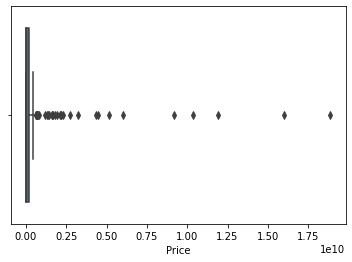

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.boxplot(data=df_priced, x='price', ax=ax)
ax.set_xlabel('Price');

Many outliers on the right side of the distribution

#### ERC20 Coins Received

In [41]:
# Create column that shows marketcap in dollars for the most received ERC20 coin

df['cap_dollars_rec'] = df['ERC20_most_rec_token_type'].map(all_coins)

In [42]:
# Confirm values appear

df['cap_dollars_rec']

0        330000000.00000
1        809000000.00000
2                1.00000
3                1.00000
4      10373000000.00000
              ...       
9836       1500000.00000
9837                 nan
9838                 nan
9839                 nan
9840             1.00000
Name: cap_dollars_rec, Length: 9816, dtype: float64

In [43]:
# Display bounds for each market cap
# Use 20th percentiles to bin market cap values

print(f"Small Cap Upper Bound: ${round(np.quantile(df_priced['price'], 0.20),1):,}")
print(f"Sm_Mid Cap Upper Bound: ${round(np.quantile(df_priced['price'], 0.40),1):,}")
print(f"Mid Cap Upper Bound: ${round(np.quantile(df_priced['price'], 0.60),1):,}")
print(f"Large Cap Upper Bound: ${round(np.quantile(df_priced['price'], 0.80),1):,}")
print(f"Ultra Cap Upper Bound: ${round(np.quantile(df_priced['price'], 1.00),1):,}")

Small Cap Upper Bound: $1,416,800.0
Sm_Mid Cap Upper Bound: $9,320,000.0
Mid Cap Upper Bound: $35,000,000.0
Large Cap Upper Bound: $282,400,000.0
Ultra Cap Upper Bound: $18,872,000,000.0


Define market cap based on 20th percent quantiles of the distribution

- Small Cap: \\$2 - \$1,416,800
- Small-Mid Cap: \\$1,416,800 - \$9,320,000
- Mid Cap: \\$9,320,000 - \$35,000,000
- Large Cap: \\$35,000,000 - \$282,400,000
- Ultra Cap: \\$282,400,000 - \$18,872,000,000

In [44]:
def market_cap_weight(x):
    """
    Compute if market cap by dollar should be grouped as small, sm-mid,
    large, or ultra
    Parameters: DataFrame values
    Output: Market cap described by an ordinal value
    """
    if x == 0:
        return 'no'
    if x == 1:
        return 'unlisted'
    elif x < 1416800:
        return 'small'
    elif x < 9320000:
        return 'small_mid'
    elif x < 35000000:
        return 'mid'
    elif x < 282400000:
        return 'large'
    elif x < 18872000000:
        return 'ultra'
    

In [45]:
# Create column that displays values 0-6 depending on market cap of average received ERC20 coin

df['weights_rec'] = df['cap_dollars_rec'].map(market_cap_weight)

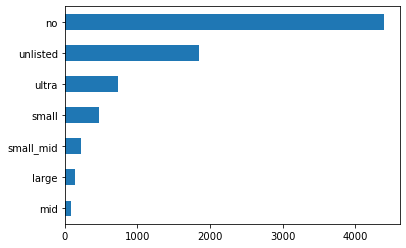

In [46]:
df['weights_rec'].value_counts(ascending=True).plot(kind='barh');

About 4000 wallets (identified by address) have never received an ERC20 token. This is not surprising given that Ethereum and Bitcoin have such a dominant market share of the crypto market. Many investors do not have experience with these alternative coins. After 'no' comes unlisted tokens. Thse are tokens that don't have a listed value on CoinGecko. After comes ultra, small, small_mid, large, and then mid. 

There's no discenrable linear relationship between market cap of coin and liklihold of user receiving the coin. Given that there are far more unlisted coins (those with very low market cap values) it makes some sense that they are the predonominant holding. 

In [ ]:
# Check for null values

df['weights_rec'].isna().sum()

Null values emerged from certain coins being misclassified during the data collection period. For example
some coins were websites, advertisements, or exchanges and not actual coins. Also, some coins were given 'None' value 
instead of 0. 0 meaning no ERC20 tokens received in the wallet. 

Going to fill null values with 0, having a mislisted coin or None is the equivalant as never having an ERC20 coin in the wallet

In [48]:
df['weights_rec'].fillna('no', inplace=True)

#### ERC20 Coins Sent

In [49]:
# Create column that shows marketcap in dollars for the most sent ERC20 coin

df['cap_dollars_sent'] = df['ERC20_most_sent_token_type'].map(all_coins)

In [50]:
# Create column that shows marketcap in dollars for the most sent ERC20 coin

df['weights_sent'] = df['cap_dollars_sent'].map(market_cap_weight)

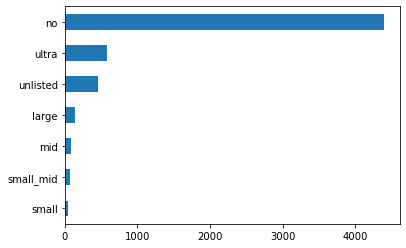

In [51]:
df['weights_sent'].value_counts(ascending=True).plot(kind='barh');

Compared to ERC20 tokens received, ultra is more common than unlisted to be sent from a wallet. If a wallet is sending, it is doing so for the purpose of exchanging for another cryptocurrency, gifting, or purchasing a good or service. Ultra may be more popular than unlisted because merchants are more likely to accept widely adopted cyrptocurrencies rather than low market cap value coins. 

In [52]:
# Check for null values

df['weights_sent'].isna().sum()

4060

In [53]:
# Check for null values

df['weights_sent'].fillna('no', inplace=True)

Same process as ERC20 tokens received

### Comparing Max Value to Average Value Sent

- If a wallet has one very large transaction, that may signal that is has been hacked and the bad actor is flushing the wallet. We would see one very large transaction compared to a much smaller average

In [54]:
df.head()

,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_diff_first_last,Sent_tnx,Received_Tnx,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,Total_tnx,total_Ether_sent,total_ether_received,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_rec_contract_addr,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type,erc_missing,cap_dollars_rec,weights_rec,cap_dollars_sent,weights_sent
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26000,1093.71000,704785.63000,721,89,40,118,0.00000,45.80678,6.58951,0.00000,31.22000,1.20068,810,865.69109,586.46667,-279.22442,265.00000,35588543.78000,35603169.52000,30.00000,54.00000,58.00000,0.00000,15000000.00000,265586.14760,0.00000,16830998.35000,271779.92000,39.00000,57.00000,Cofoundit,Numeraire,0,330000000.00000,ultra,1.00000,unlisted
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07000,2958.44000,1218216.73000,94,8,5,14,0.00000,2.61327,0.38569,0.00000,1.80000,0.03284,102,3.08730,3.08548,-0.00182,8.00000,403.42831,2.26081,1.00000,5.00000,7.00000,0.00000,365.00000,57.63262,2.26081,2.26081,2.26081,1.00000,7.00000,Livepeer Token,Livepeer Token,0,809000000.00000,ultra,809000000.00000,ultra
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54000,2434.02000,516729.30000,2,10,10,2,0.11312,1.16545,0.35891,0.05000,3.53862,1.79431,12,3.58862,3.58906,0.00044,8.00000,521.51207,0.00000,0.00000,7.00000,8.00000,0.00000,442.81984,65.18901,0.00000,0.00000,0.00000,0.00000,8.00000,None,XENON,0,1.00000,unlisted,nan,no
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60000,15785.09000,397555.90000,25,9,7,13,0.00000,500.00000,99.48884,0.00000,450.00000,70.00183,34,1750.04586,895.39956,-854.64630,14.00000,17111.05191,11412.23068,2.00000,11.00000,11.00000,0.00000,11412.23068,1555.55017,100.00000,9029.23068,3804.07689,1.00000,11.00000,Raiden,XENON,0,1.00000,unlisted,53000000.00000,large
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61000,10707.77000,382472.42000,4598,20,7,19,0.00000,12.80241,2.67110,0.00000,9.00000,0.02269,4619,104.31888,53.42190,-50.89699,42.00000,162829.66090,123539.93290,4.00000,23.00000,27.00000,0.00000,90000.00000,4934.23215,0.00000,45000.00000,13726.65922,6.00000,27.00000,StatusNetwork,EOS,0,10373000000.00000,ultra,624000000.00000,ultra


In [55]:
# Create column to show max value sent vs. avg. value sent

df['max_div_avg'] = df['max_val_sent']/df['avg_val_sent']

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/Users/ethankunin/opt/anaconda3/envs/learn-env/l

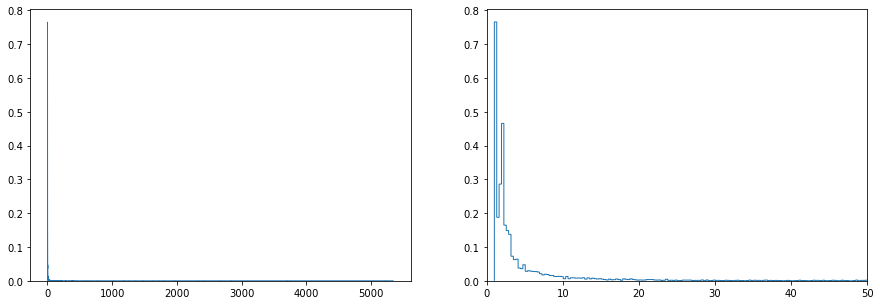

In [56]:
# Visualize distribution

fig, axes = plt.subplots(figsize=(15,5),ncols=2)
axes[0].hist(df['max_div_avg'], bins='auto', density=True, histtype='step')

axes[1].hist(df['max_div_avg'], bins='auto', density=True, histtype='step')
axes[1].set_xlim(left=0,right=50);

Data is very left skewed. Most of the values are below 10 but there are outliers values on the right side of the distribution

In [57]:
df['max_div_avg'].sort_values(ascending=False)

7206   5344.33445
7082   5221.72742
6478   3755.86854
6828   3707.75812
266    2843.00000
          ...    
9832          nan
9833          nan
9835          nan
9837          nan
9839          nan
Name: max_div_avg, Length: 9816, dtype: float64

In [58]:
# Check how max_div_avg compares for fraud vs. non-fraud wallets

df.groupby('FLAG')['max_div_avg'].agg(['mean', 'median'])

,mean,median
FLAG,,
0,16.00695,2.31129
1,4.14258,1.06056


- Non fraud has a greater median and mean max sent divided by the average transation size
- Contrary to hypothesis

### Remove Redudant Columns

In [59]:
df.head()

,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_diff_first_last,Sent_tnx,Received_Tnx,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,Total_tnx,total_Ether_sent,total_ether_received,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_rec_contract_addr,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type,erc_missing,cap_dollars_rec,weights_rec,cap_dollars_sent,weights_sent,max_div_avg
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26000,1093.71000,704785.63000,721,89,40,118,0.00000,45.80678,6.58951,0.00000,31.22000,1.20068,810,865.69109,586.46667,-279.22442,265.00000,35588543.78000,35603169.52000,30.00000,54.00000,58.00000,0.00000,15000000.00000,265586.14760,0.00000,16830998.35000,271779.92000,39.00000,57.00000,Cofoundit,Numeraire,0,330000000.00000,ultra,1.00000,unlisted,26.00191
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07000,2958.44000,1218216.73000,94,8,5,14,0.00000,2.61327,0.38569,0.00000,1.80000,0.03284,102,3.08730,3.08548,-0.00182,8.00000,403.42831,2.26081,1.00000,5.00000,7.00000,0.00000,365.00000,57.63262,2.26081,2.26081,2.26081,1.00000,7.00000,Livepeer Token,Livepeer Token,0,809000000.00000,ultra,809000000.00000,ultra,54.80453
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54000,2434.02000,516729.30000,2,10,10,2,0.11312,1.16545,0.35891,0.05000,3.53862,1.79431,12,3.58862,3.58906,0.00044,8.00000,521.51207,0.00000,0.00000,7.00000,8.00000,0.00000,442.81984,65.18901,0.00000,0.00000,0.00000,0.00000,8.00000,None,XENON,0,1.00000,unlisted,nan,no,1.97213
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60000,15785.09000,397555.90000,25,9,7,13,0.00000,500.00000,99.48884,0.00000,450.00000,70.00183,34,1750.04586,895.39956,-854.64630,14.00000,17111.05191,11412.23068,2.00000,11.00000,11.00000,0.00000,11412.23068,1555.55017,100.00000,9029.23068,3804.07689,1.00000,11.00000,Raiden,XENON,0,1.00000,unlisted,53000000.00000,large,6.42840
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61000,10707.77000,382472.42000,4598,20,7,19,0.00000,12.80241,2.67110,0.00000,9.00000,0.02269,4619,104.31888,53.42190,-50.89699,42.00000,162829.66090,123539.93290,4.00000,23.00000,27.00000,0.00000,90000.00000,4934.23215,0.00000,45000.00000,13726.65922,6.00000,27.00000,StatusNetwork,EOS,0,10373000000.00000,ultra,624000000.00000,ultra,396.68547


In [60]:
cols_to_drop = ['cap_dollars_rec', 'cap_dollars_sent']

In [61]:
df = df.drop(columns=cols_to_drop, axis=1)

Dropping the market cap weights because those are reprsented as categorical variables

# EXPLORE

- Observe how the variables are correlated with fraud
- See how the variables differ when viewing fraudulent vs non-fraudulent wallet transactions
- Analyze the distribution of key variables

## Inspect Correlation

In [62]:
# Check correlation with FLAG

corr = pd.DataFrame(df.corr().iloc[0])
corr['abs'] = abs(corr['FLAG'])
corr.sort_values(by='abs', ascending=False).drop('FLAG', axis=0).rename(columns={'FLAG':'corr_value'})

,corr_value,abs
erc_missing,0.56859,0.56859
Time_diff_first_last,-0.26961,0.26961
Avg_min_between_received_tnx,-0.11864,0.11864
Total_tnx,-0.10055,0.10055
Received_Tnx,-0.07954,0.07954
Sent_tnx,-0.07819,0.07819
avg_val_sent,-0.06336,0.06336
Unique_Sent_To_Addresses,-0.04569,0.04569
max_div_avg,-0.03348,0.03348
Unique_Received_From_Addresses,-0.03207,0.03207


Correlation only sorts through numeric data. Erc_missing has the strongest correlation with fraud. This variable indicates that the ERC20 transaction records are missing. I suspect they are missing because the owner of the wallet did not know that the transactions were being made because they were hacked. The second strongest correlation is time diff between first and last which represents the number of minutes between the first and last transaction. This represents how long the wallet has been in use. The longer the wallet has been in use, the less liklihood that it has been a victim of fraudulant transactions because it has a negative correlation. Most of the correlation values are very low.

<AxesSubplot:>

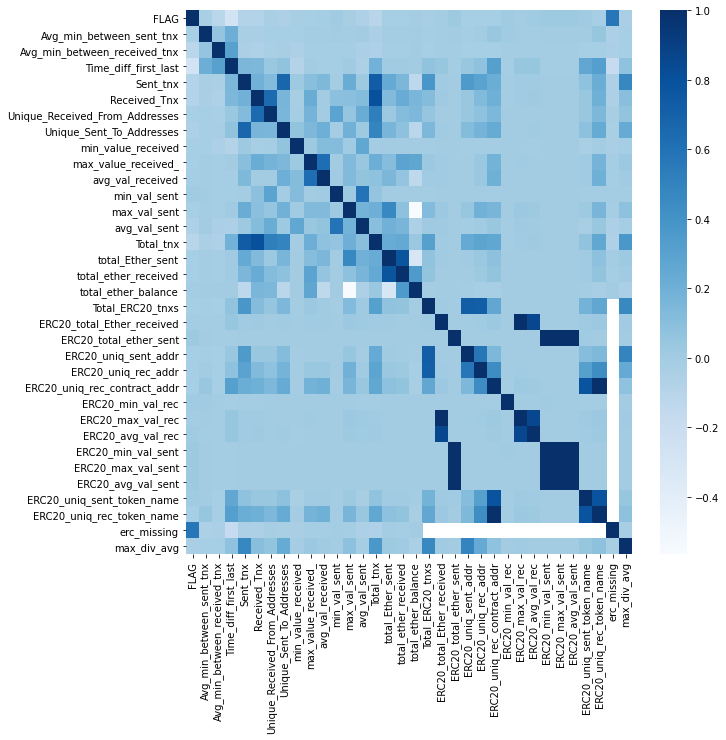

In [63]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Blues')

- In general, the variables do not have much correlation with each other
- What stands out is that ERC statistics have lower than average correlation with non-ERC statistics of the same measurement

In [64]:
# See the difference between variables for fraudulent vs non-fraudulent wallets

df.groupby('FLAG').agg(['mean', 'median', 'std'])

Avg_min_between_sent_tnx                       \
                         mean   median         std   
FLAG                                                 
0                  5419.36464 22.75000 22482.32234   
1                  3888.10978  0.00000 17505.36774   

     Avg_min_between_received_tnx                        Time_diff_first_last  \
                             mean     median         std                 mean   
FLAG                                                                            
0                      9461.69245 1403.40000 25348.31384         264682.31558   
1                      2874.71264   82.07000 10624.45345          55230.05795   

                                Sent_tnx                  Received_Tnx         \
           median          std      mean median       std         mean median   
FLAG                                                                            
0    116874.32000 347781.85520 147.81131      3 856.83729    204.05316      5   
1      7545.43000 107518.11855   5.17393      1  21.88457     23.77559      3   

                Unique_Received_From_Addresses                   \
            std                           mean median       std   
FLAG                                                              
0    1055.92653                       35.54511      2 336.77842   
1     253.95316                       12.47591      3  69.38081   

     Unique_Sent_To_Addresses                  min_value_received          \
                         mean median       std               mean  median   
FLAG                                                                        
0                    32.33181      2 299.09977           47.58111 0.15619   
1                     3.29050      1  11.74678           30.61951 0.00446   

               max_value_received_                      avg_val_received  \
           std                mean   median         std             mean   
FLAG                                                                       
0    234.53003           658.32408 12.22828 14759.73472        119.03829   
1    535.34934            53.38374  0.99790   707.31051         36.44084   

                        min_val_sent                   max_val_sent          \
      median        std         mean  median       std         mean  median   
FLAG                                                                          
0    3.75000 3261.14888      4.32108 0.05600 145.80478    394.17178 9.70000   
1    0.50013  557.83591      6.52228 0.01000 110.74033     35.72138 0.68800   

                avg_val_sent                   Total_tnx                    \
            std         mean  median       std      mean median        std   
FLAG                                                                         
0    7518.25725     52.72600 2.30963 228.85131 356.64384     11 1521.21828   
1     518.60499     16.26376 0.49914 270.48611  29.04268      5  256.32696   

     total_Ether_sent                       total_ether_received           \
                 mean   median          std                 mean   median   
FLAG                                                                        
0         13066.23738 34.08280 406713.29585          14967.21642 71.66745   
1            87.37340  0.99914   1689.40933             96.89472  1.67884   

                  total_ether_balance                      Total_ERC20_tnxs  \
              std                mean  median          std             mean   
FLAG                                                                          
0    413377.46852          1900.97903 0.00220 275193.58099         41.16669   
1      1215.59725             9.52132 0.00086   1622.91265          8.86000   

                       ERC20_total_Ether_received                             \
      median       std                       mean   median               std   
FLAG                                                                           
0    0.000

In all of the values, the mean is magnitudes larger than the median values which indicates that there is significant skew in the data and there are large outlier values on the right side of the distribution. Additionally, fraud and non-fraud variables have very different characteristics. The median is similar in certain instances but the means are very different

Given that there is a large separation in summary statistics between fraud vs. non-fraud wallets, I am confident the model will be able to effectively classify transactions

## Inspecting Distribution

In [65]:
# Separate out columns that do not contain ERC20 information

df.columns
ether_cols = [col for col in df.columns if col not in 'ERC']
ether_cols
erc = set(df.columns[df.columns.str.contains('ERC')])
non_erc = set(df.columns)
non_erc = list(non_erc.difference(erc))
non_erc.remove('Address')
non_erc.remove('FLAG')

In [66]:
df.columns
ether_cols = ['Avg_min_between_sent_tnx',
       'Avg_min_between_received_tnx', 'Time_diff_first_last', 'Sent_tnx',
       'Received_Tnx', 'Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received_',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'Total_tnx', 'total_Ether_sent', 'total_ether_received',
       'total_ether_balance', 'max_div_avg']

In [67]:
# Subset data into fraudulent vs non-fraudulent wallets

df_fraud = df[df['FLAG']==1]
df_valid = df[df['FLAG']==0]

In [68]:
from numpy import median

def valid_fraud_comparison(df1, df2, col):
    """
    Comopare variable of valid vs. fraudulent transactions
    Parameters: DataFrame Valid and DataFrame Fraud
    Output: Two histograms displaying median and mean
    """
    fig, axes = plt.subplots(ncols=3, figsize=(15,4))
    

    valid_median=round(df1[col].median(),2)
    valid_mean=round(df1[col].mean(),2)
    axes[0].hist(df1[col],label=f'Median:{valid_median} \n Mean:{valid_mean}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')
    axes[0].set_title('Valid')
    axes[0].legend()

    fraud_median=round(df_fraud[col].median(),2)
    fraud_mean=round(df_fraud[col].mean(),2)
    axes[1].hist(df_fraud[col], color='C3',label=f'Median:{fraud_median} \n Mean:{fraud_mean}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Count')
    axes[1].set_title('Fraud')
    axes[1].legend()


    sns.barplot(data=df, y=col, x='FLAG',ax=axes[2],ci=68, estimator=median, palette=['C0', 'C3'])
    axes[2].set_xlabel('FLAG')
    axes[2].set_xticklabels(['Valid', 'Fraud'])
    fig.tight_layout()
    plt.show();


Avg_min_between_sent_tnx


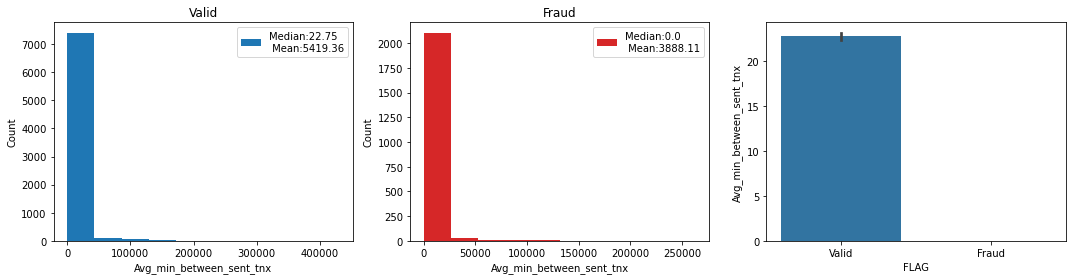

-----------------------
Avg_min_between_received_tnx


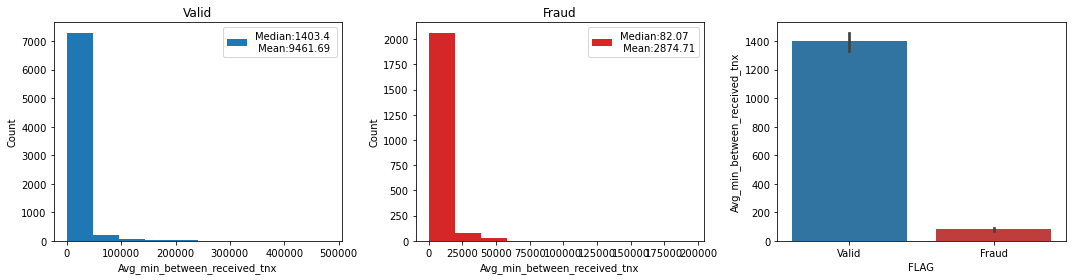

-----------------------
Time_diff_first_last


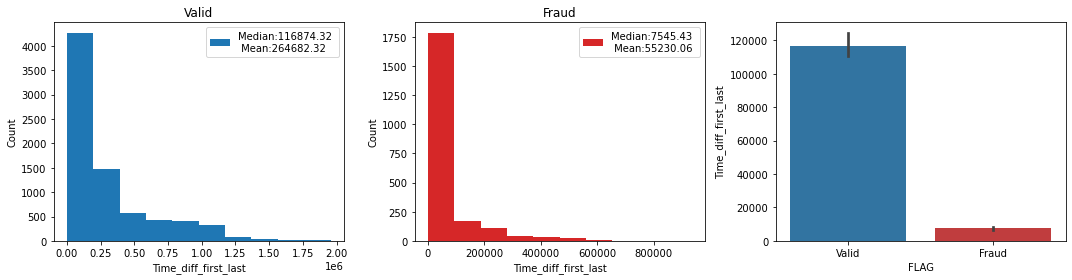

-----------------------
Sent_tnx


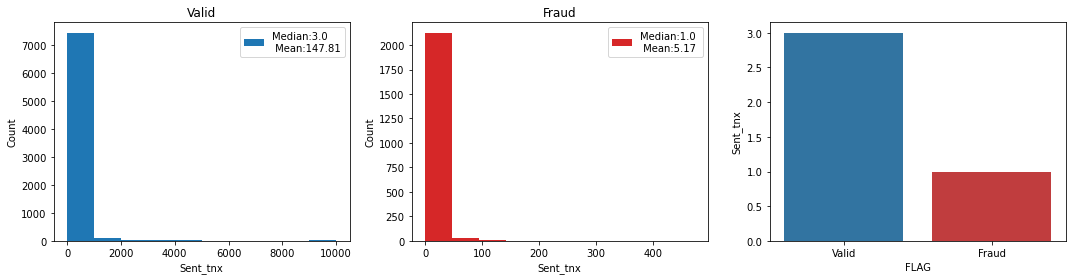

-----------------------
Received_Tnx


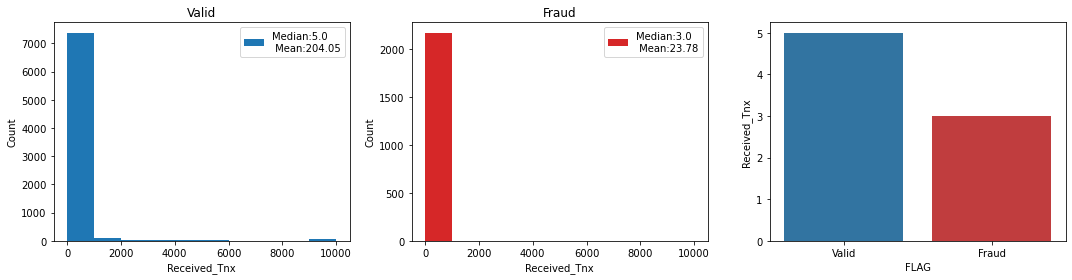

-----------------------
Unique_Received_From_Addresses


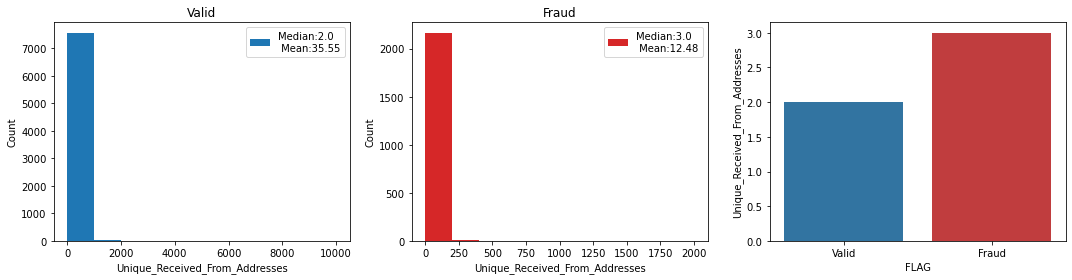

-----------------------
Unique_Sent_To_Addresses


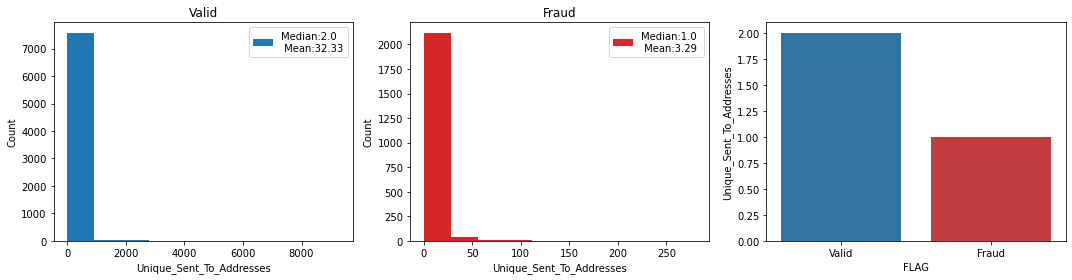

-----------------------
min_value_received


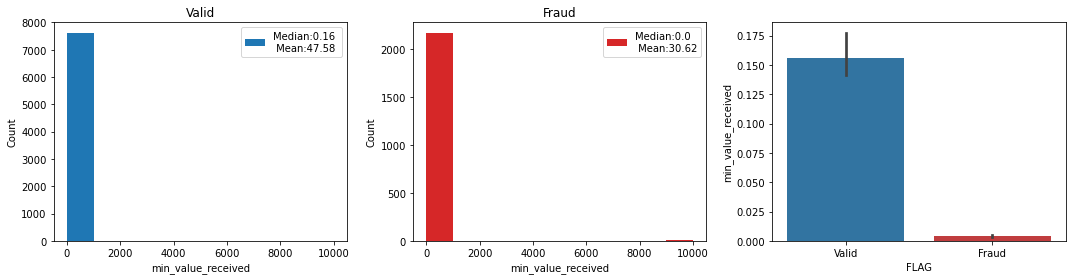

-----------------------
max_value_received_


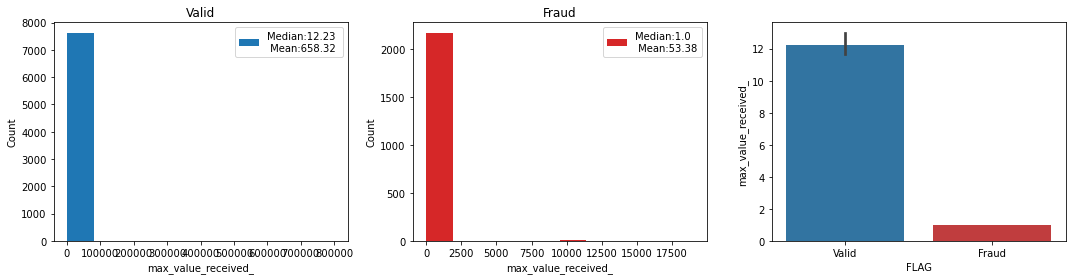

-----------------------
avg_val_received


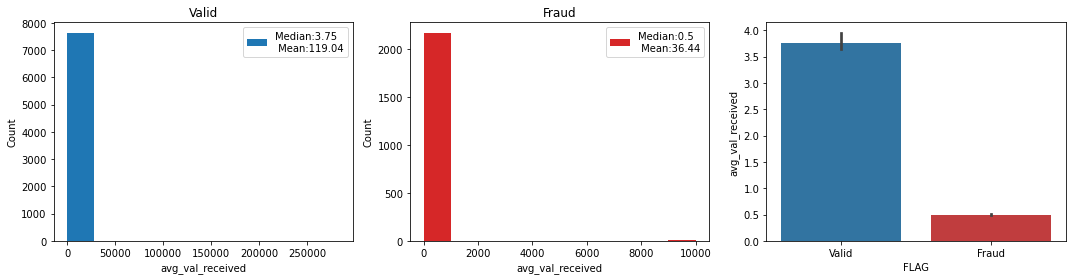

-----------------------
min_val_sent


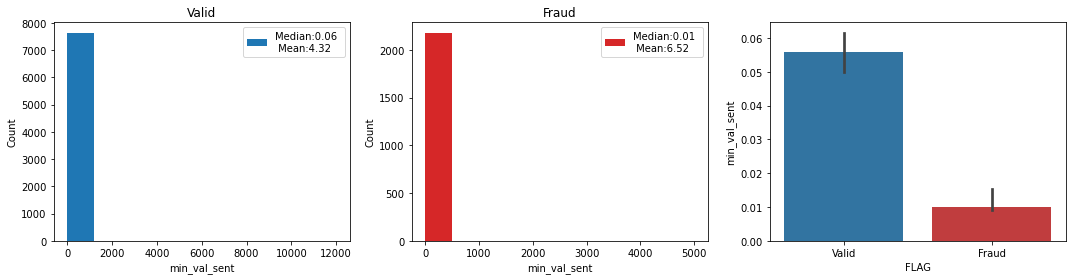

-----------------------
max_val_sent


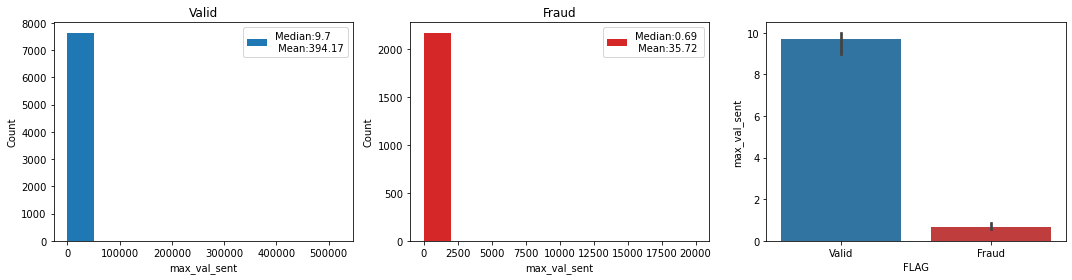

-----------------------
avg_val_sent


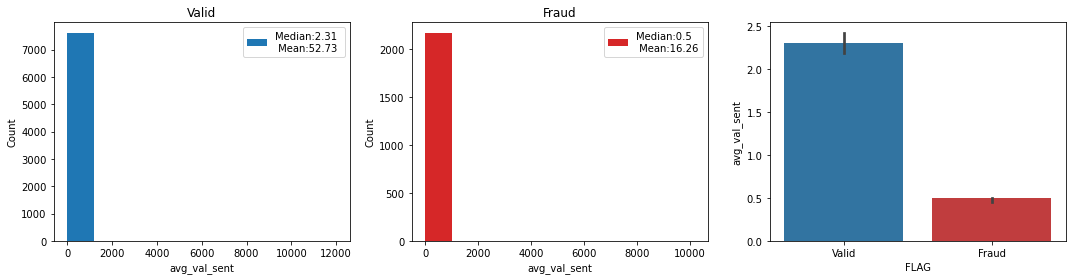

-----------------------
Total_tnx


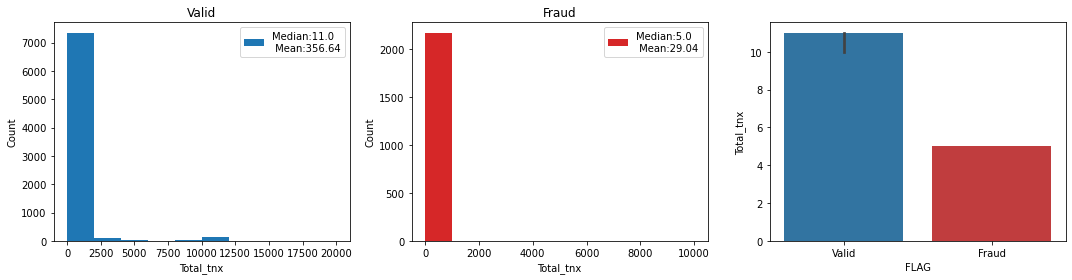

-----------------------
total_Ether_sent


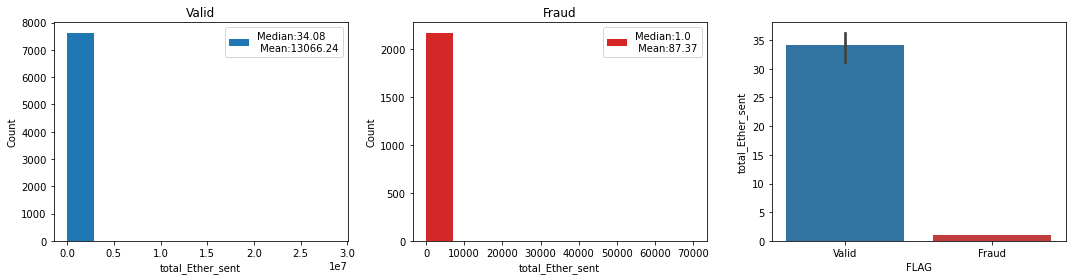

-----------------------
total_ether_received


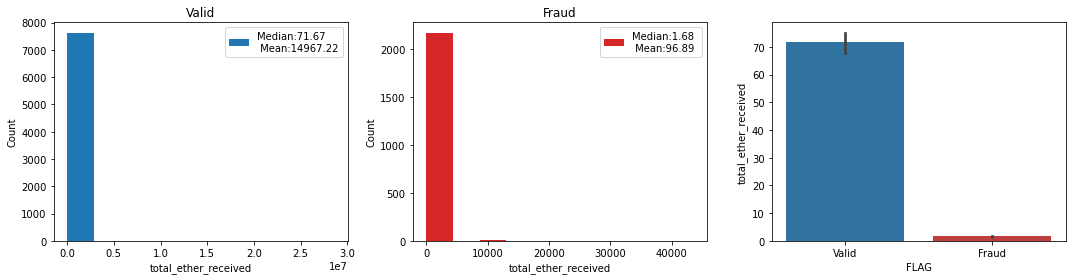

-----------------------
total_ether_balance


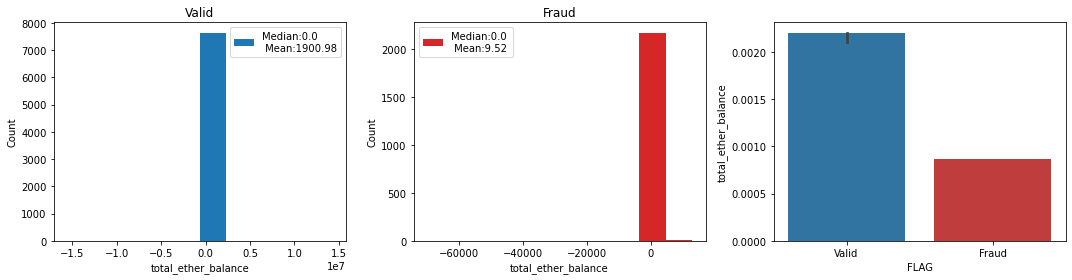

-----------------------
max_div_avg


/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


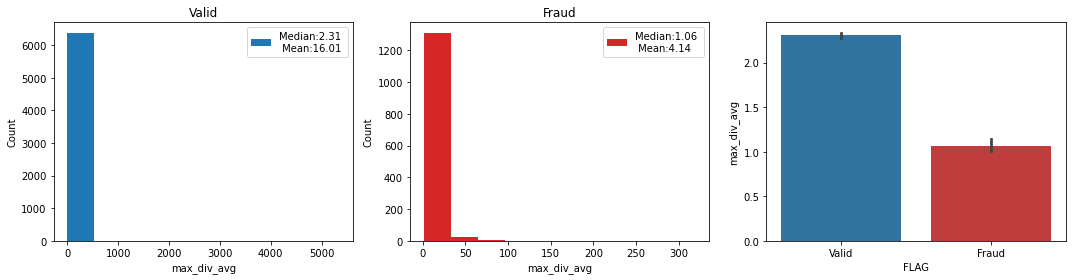

-----------------------


In [69]:
for col in ether_cols:
    print(col)
    valid_fraud_comparison(df_valid, df_fraud, col)
    print('-----------------------')
    

- All of the data is left skewed
- There are significant outliers on the right side of the distribution
- Most observations are within a tight range and then outlier values on the far right side of the distribution
- Valid transactions tend to have larger values

## Inspect Relationship between ERC20 and Ethereum Transactions

In [185]:
# Sort data into corresponding ETH vs. ERC20 Data

ether_cols = ['Total_tnx','Unique_Received_From_Addresses',
       'Unique_Sent_To_Addresses', 'min_value_received', 'max_value_received_',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'total_Ether_sent', 'total_ether_received']

ERC20_cols = ['Total_ERC20_tnxs', 'ERC20_uniq_rec_addr', 'ERC20_uniq_sent_addr',
              'ERC20_min_val_rec', 'ERC20_max_val_rec', 'ERC20_avg_val_rec',
              'ERC20_min_val_sent','ERC20_max_val_sent', 'ERC20_avg_val_sent',
              'ERC20_total_ether_sent','ERC20_total_Ether_received']

In [72]:
# Confirm the features between ETH and ERC20 match up

eth_erc_cols = list(zip(ether_cols, ERC20_cols))
eth_erc_cols

[('Total_tnx', 'Total_ERC20_tnxs'),
 ('Unique_Received_From_Addresses', 'ERC20_uniq_rec_addr'),
 ('Unique_Sent_To_Addresses', 'ERC20_uniq_sent_addr'),
 ('min_value_received', 'ERC20_min_val_rec'),
 ('max_value_received_', 'ERC20_max_val_rec'),
 ('avg_val_received', 'ERC20_avg_val_rec'),
 ('min_val_sent', 'ERC20_min_val_sent'),
 ('max_val_sent', 'ERC20_max_val_sent'),
 ('avg_val_sent', 'ERC20_avg_val_sent'),
 ('total_Ether_sent', 'ERC20_total_ether_sent'),
 ('total_ether_received', 'ERC20_total_Ether_received')]

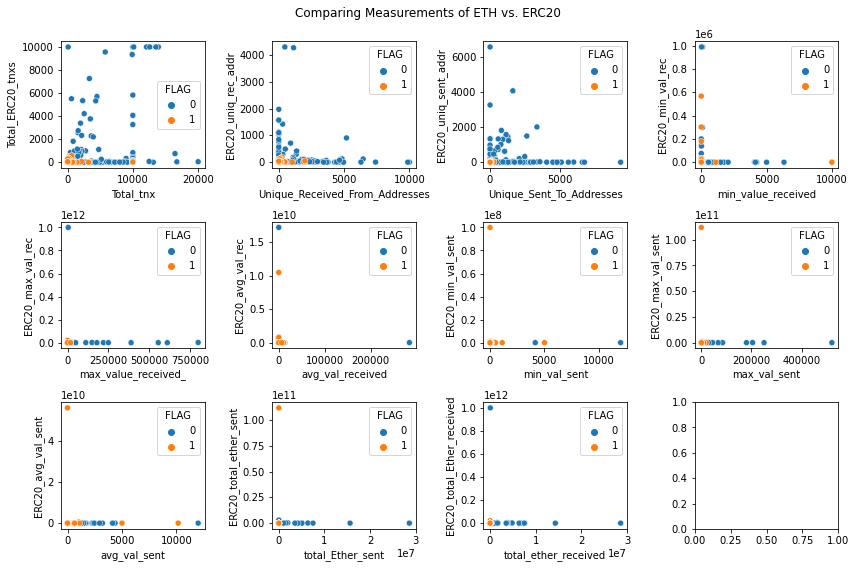

In [186]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,8))
axes=axes.flatten()
for ax, (eth, erc) in zip(axes, eth_erc_cols):
         sns.scatterplot(data=df, x=eth, y=erc, hue='FLAG',ax=ax)
fig.suptitle('Comparing Measurements of ETH vs. ERC20')
fig.tight_layout()

- The main conclusion is that ether non-fraud transactions seem to have the most variance
- Fraudulant transactions typically have lower values than valid transactions
- ETH transaction statistics have a greater variance than ERC20 transaction statistics

# MODEL

Based on our EDA and goal of the model, I will build a K-Nearest Neighbors model and Random Forest model. The dataset has many outlier values and random forests do a good job of handling outlier values.

The purpose of the model is to accurately predict fraudulent transactions. I am prioritizing recall over other evaluation metrics because the cost of false negative is greater than the cost of false positive. If a customer receives a notification for potential fraud that is not fraud, there is a little harm. If the model suspects fraud, but does not notify the customer because it is more focused on precision, the damages are higher. Can quanitify the value of the model by seeing how it compares to a dummy model, and then calculating how much in ether it would have saved if it notified customers of fraud. 

60% of the crypto market share is in either Bitcoin or Ethereum. Bitcoins controls 40% of the market share, Ethereum 20%, and the next largest coin controls 2.5% of the market share. The model predicts fraud in ETH and ERC20 transactions. Since ETH controls a large market share in the crypto space, this model is broad reaching.

In [76]:
from sklearn.model_selection import train_test_split
y=df['FLAG']
X = df.drop(columns=['Address', 'FLAG', 'ERC20_most_sent_token_type', 'ERC20_most_rec_token_type'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [188]:
# Ensure split was succesful

print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(2945, 35)
(2945,)
(6871, 35)
(6871,)


## Preprocessing Pipeline

- Used to quickly one-hot encode categorical variables and scale numeric variables

In [78]:
from sklearn.pipeline import Pipeline, make_pipeline

# Pull out numeric columns

num_cols = X_train.select_dtypes('number').columns.to_list()

We know that the ERC20 values have a lot of null values when cases are fraudulent. Given that they are numeric columns, they must be encoded with a number. Choosing to encode with median over mean because it is resistant to outliers. Could also choose to impute value that is on the end of the distribution but that will artifically increase or decrease the skew of the data.

In [79]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create numeric pipeline with imputer

num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())])

In [80]:
## Pull out categorical columns

cat_cols = X_train.select_dtypes('O').columns.tolist()

In [81]:
# Create categorical imputer

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

Using 'most_frequent' strategy because it has the least bias for filling null categorical variables when it generalizes to new data

In [82]:
# Create column transformer to handle numeric and categorical columns

from sklearn.compose import ColumnTransformer,make_column_transformer

scaled_preprocessing=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])

In [83]:
# Get X_train and X_test from column transformer
# Fit and transform on training data
# Transform on test data

X_train_p = scaled_preprocessing.fit_transform(X_train)
X_test_p = scaled_preprocessing.transform(X_test)

In [84]:
def get_column_names(train_matrix, train_df, test_matrix, test_df):
    """
    Creates dataframes with columns from original training data
    Parameters: Train data matrix, train data dataframe, test data matrix, test dataframe
    Returns: 1 X_train dataframe with columns and 1 X_test dataframe with columns
    """
    feature_names = scaled_preprocessing.named_transformers_['cat'].\
                named_steps['encoder'].get_feature_names(cat_cols).tolist()
    X_cols = num_cols+feature_names
    X_train_df = pd.DataFrame(train_matrix,columns=X_cols,index=train_df.index)
    X_test_df = pd.DataFrame(test_matrix,columns=X_cols,index=test_df.index)
    return X_train_df, X_test_df

In [85]:
# def get_column_names(preprocessor, train_matrix, train_df, test_matrix, test_df):
#     """
#     Creates dataframes with columns from original training data
#     Parameters: Train data matrix, train data dataframe, test data matrix, test dataframe
#     Returns: 1 X_train dataframe with columns and 1 X_test dataframe with columns
#     """
#     feature_names = preprocessor.named_transformers_['cat'].\
#                 named_steps['encoder'].get_feature_names(cat_cols).tolist()
#     X_cols = num_cols+feature_names
#     X_train_df = pd.DataFrame(train_matrix,columns=X_cols,index=train_df.index)
#     X_test_df = pd.DataFrame(test_matrix,columns=X_cols,index=test_df.index)
#     return X_train_df, X_test_df

In [86]:
# Run function to retrieve train and test data

X_train_s, X_test_s = get_column_names(X_train_p, X_train, X_test_p, X_test)

In [87]:
train_test_s = [X_train_s, X_test_s, y_train, y_test]

## SMOTE

- Given that we have class imbalance, will use SMOTE to balance target value distribution

In [88]:
df['FLAG'].value_counts(1)

0   0.77802
1   0.22198
Name: FLAG, dtype: float64

For our models to provide accurate predictions, the target value be balanced 50-50

In [89]:
# Import SMOTE

from imblearn.over_sampling import SMOTE

In [90]:
sm = SMOTE(random_state=42)

In [91]:
X_train_sm, y_train_sm = sm.fit_resample(X_train_s, y_train)

In [92]:
print(y_train_sm.value_counts(1))
print('-----------------')
print(y_train_sm.value_counts())

1   0.50000
0   0.50000
Name: FLAG, dtype: float64
-----------------
1    5338
0    5338
Name: FLAG, dtype: int64


In [93]:
print(X_train_sm.shape)
X_test_s.shape

(10676, 47)


(2945, 47)

## Dummy Baseline Model
- Compare to final model to see how well it performs
- Simply predicts target based on mean

In [94]:
# Create dummy model for baseline

from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='stratified', random_state=42)
dummy_clf.fit(X_train_sm,y_train_sm)

DummyClassifier(random_state=42, strategy='stratified')

In [95]:
from sklearn.metrics import plot_roc_curve, auc, plot_confusion_matrix, \
                            f1_score, recall_score, classification_report



def evaluate_model(fit_model, X_train, X_test, y_train, y_test, cmap='Blues', normalize='true', dummy=False):
    """
    Returns results of a fit model
    Parameters: fit model, training and test data, can optionally adjust color palette and normalized matrix
    Returns: Classification report, ROC curve, AUC score, confusion matrix, and training vs test F1 results
    """
    
    y_hat_test = fit_model.predict(X_test)
    y_hat_train = fit_model.predict(X_train)
    
    print(classification_report(y_test, y_hat_test, target_names=['valid', 'fraud']))
    
    fig, axes = plt.subplots(ncols=2, figsize=(10,4))
    plot_roc_curve(fit_model, X_test, y_test, ax=axes[0])
    plot_confusion_matrix(fit_model, X_test, y_test, cmap=cmap, normalize=normalize, ax=axes[1])
    plt.show()
    
    
    # Using F1 weighted because my data has a class imbalance
    recall_train=round(recall_score(y_train, y_hat_train, average='weighted'),5)
    recall_test=round(recall_score(y_test, y_hat_test, average='weighted'),5)
    recall=round(recall_score(y_test, y_hat_test),5)
    
    print(f"Recall training score: {recall_train}")
    print(f"Recall test score: {recall_test}")
    if recall_train > recall_test:
        print(f"Overfit by +{round(recall_train-recall_test,5)}")
    else:
        print(f"Underfit by -{round(recall_train-recall_test,5)}") 
    print('---------------')
    if dummy==True:
        pass
    else:
        print(f"Recall score improvement: +{recall-0.52}")
    

In [96]:
train_test_sm = [X_train_sm, X_test_s, y_train_sm, y_test]

In [97]:
print(X_train_sm.shape)
print(y_train_sm.shape)
print(X_test_s.shape)
print(y_test.shape)

(10676, 47)
(10676,)
(2945, 47)
(2945,)


              precision    recall  f1-score   support

       valid       0.79      0.51      0.62      2299
       fraud       0.23      0.52      0.32       646

    accuracy                           0.51      2945
   macro avg       0.51      0.52      0.47      2945
weighted avg       0.67      0.51      0.55      2945



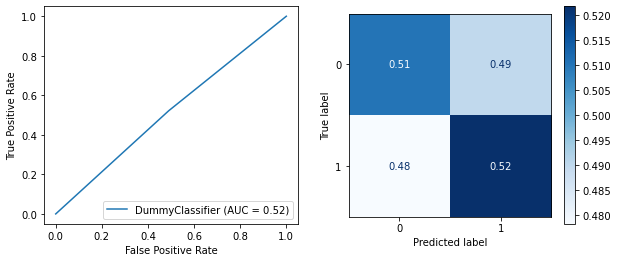

Recall training score: 0.50178
Recall test score: 0.51273
Underfit by --0.01095
---------------


In [98]:
evaluate_model(dummy_clf, *train_test_sm, dummy=True)

- Fraudulent recall score was 0.52, this is our most important classifier
- Out of all fraud cases, the model accurately predicted 52% of them
- Goal of future models to boost recall score of target
- The model is underfit by about 5%

## K-Nearest Neighbors Model
- Assumptions: Data is scaled
- Begin with vanilla model and then tune using GridSearchCV

### Vanilla KNN

In [99]:
train_sm = [X_train_sm, y_train_sm]

In [100]:
# Fit a vanilla KNN model 

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(*train_sm)

KNeighborsClassifier()

              precision    recall  f1-score   support

       valid       0.98      0.96      0.97      2299
       fraud       0.88      0.92      0.90       646

    accuracy                           0.96      2945
   macro avg       0.93      0.94      0.94      2945
weighted avg       0.96      0.96      0.96      2945



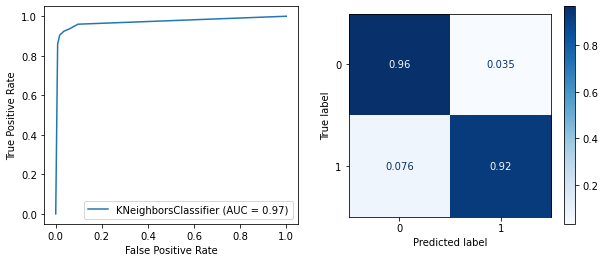

Recall training score: 0.98089
Recall test score: 0.95586
Overfit by +0.02503
---------------
Recall score improvement: +0.40415


In [101]:
evaluate_model(knn_clf, *train_test_sm)

- The KNN F1 scores and recall scores jumped significantly from the dummy model
- AUC score is 0.97, almost at 1.00, the max
- Out of all fraud cases, the model accurately predicted 92% of them
- **Next:** Run grid search to try and optimize recall

#### Testing for Feature Selection

In [102]:
# Bring in Variance Threshold

from sklearn.feature_selection import VarianceThreshold

In [103]:
## Check for uniform features

selector = VarianceThreshold(threshold=0.00)
selector.fit(X_train_sm)

VarianceThreshold()

In [104]:
# Check columns for uniform features

keep_features = selector.get_support()
keep_features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [105]:
# Confirm no columns have uniform features

keep_features.sum()==len(X_train_sm.columns)

True

In [106]:
# Original number of columns

keep_features.sum()

47

In [107]:
from sklearn.feature_selection import VarianceThreshold

def variance_thresh(X_train, thresh):
    """
    Produces number of remaining columns for given threshold using sklearn built in tools
    Parameters: X_train, threshold
    Returns: % of remaining features
    """
    selector = VarianceThreshold(threshold=thresh)
    selector.fit(X_train)
    keep_features = selector.get_support()
    remaining = (keep_features.sum()/len(X_train.columns))
    return remaining

In [108]:
# Create loop to show remaining number of columns at certain threshold levels

rem = []
for thresh in np.linspace(0,1,101):    
    rem.append(variance_thresh(X_train_sm, thresh))

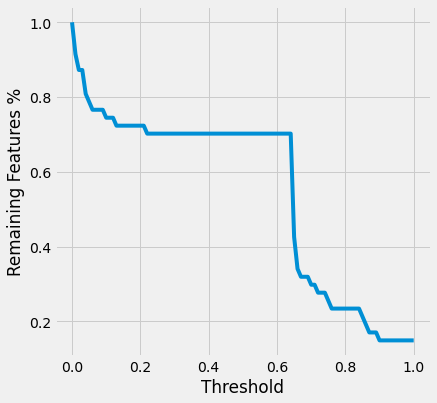

In [109]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(6,6))
    sns.lineplot(x=np.linspace(0,1,101), y=rem)
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Remaining Features %');

A significant amount of my features are low variance because it takes a high threshold (compared to rule of thumb of 0.01) to remove just 30% of my features. Looks like the optimal tradeoff between feature removal and threshold is between 0.01-0.05

In [110]:
# Instantiate Variance threshold

selector = VarianceThreshold(threshold=0.01)
selector.fit(X_train_sm)

VarianceThreshold(threshold=0.01)

In [111]:
# Check number of columns remaining

keep_features = selector.get_support()
keep_features.sum()

43

In [112]:
# Manipulate DF to include new columns after feature selection

X_train_sel = X_train_sm.loc[:,keep_features]
X_test_sel = X_test_s.loc[:,keep_features]

In [113]:
# Fit model with new columns

knn_clf.fit(X_train_sel, y_train_sm)

KNeighborsClassifier()

              precision    recall  f1-score   support

       valid       0.98      0.97      0.97      2299
       fraud       0.88      0.93      0.90       646

    accuracy                           0.96      2945
   macro avg       0.93      0.95      0.94      2945
weighted avg       0.96      0.96      0.96      2945



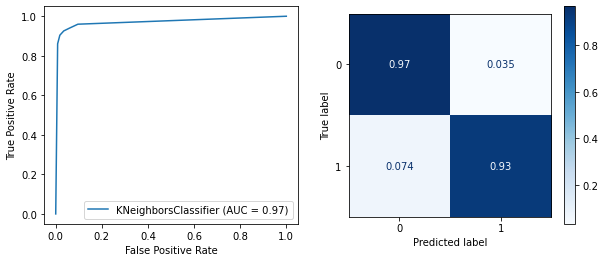

Recall training score: 0.98089
Recall test score: 0.95654
Overfit by +0.02435
---------------
Recall score improvement: +0.40569999999999995


In [114]:
evaluate_model(knn_clf, X_train_sel, X_test_sel, y_train_sm, y_test)

- Features have been removed and recall score has gone up which is the metric we are looking to optimize
- Recall score improved from 0.91 to 0.93

In [115]:
set(X_train_sm.columns).difference(set(X_train_sel))

{'weights_rec_mid',
 'weights_sent_mid',
 'weights_sent_small',
 'weights_sent_small_mid'}

- Proceed with this model because improved score
- Dropping the smaller market cap values from the feature that we engineered
- Unlike linear regression, it is acceptable to drop certain columns because not concerned with multicollinearity

In [116]:
# from sklearn.metrics import recall_score

# def thresh_vs_recall(X_train, X_test, y_train, y_test, thresh):
    
#     selector = VarianceThreshold(threshold=thresh)
#     selector.fit(X_train)
#     keep_features = selector.get_support()
    
#     X_train_sel = X_train.loc[:,keep_features]
#     X_test_sel = X_test.loc[:,keep_features]
    
#     knn_clf = KNeighborsClassifier()
#     knn_clf.fit(X_train_sel, y_train)
    
#     y_hat_test = knn_clf.predict(X_test_sel)
#     recall_score(y_test, y_hat_test)
    
#     return recall_score

In [117]:
# thresh_vs_recall(X_train_sel, X_test_sel, y_train_sm, y_test, 0.01)

In [118]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

### KNN Tuning

- Prioritizing recall because cost of false positive is low but cost of false negative is very high
- Sacrafising a balance of F1 to achieve a higher recall score
- Test out various hyperparamaters in an interative fashion to find the model that produces the highest recall score

In [119]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, param_grid, X_train, y_train,cv=3, scoring='recall'):
    """
    Returns dictionary containing dataframe and best parameters
    Parameters: classifcation model, parameter_grid for grid search, X_train, y_train
    Output: Dictionary containing sorted dataframe and best paramaeters for optimizing scoring metric
    Keys: dataframe, best_params
    """
    results_dict={}
    
    grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X_train, y_train)
    grid_search_df = pd.DataFrame(grid_search.cv_results_)
    cols_to_drop = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params']
    grid_search_df = grid_search_df.drop(columns=cols_to_drop, axis=1)
    
    results_dict['dataframe'] = grid_search_df.sort_values(by='rank_test_score')
    results_dict['best_params'] = grid_search.best_params_
    
    return results_dict   

In [120]:
# Set up parameter grid

knn_param_grid = {
    'n_neighbors': [2,5,10,15,30],
    'weights': ['uniform', 'distance'],
    'metric':['euclidean', 'manhattan']}

In [121]:
# Set up lists to make parameters easier to fill in

train_test_sel = [X_train_sel, X_test_sel, y_train_sm, y_test]
train_sel = [X_train_sel, y_train_sm]

In [122]:
# Run function to create dictionary of results
# Optimizing for recall

knn_res = grid_search(knn_clf, knn_param_grid, *train_sel, scoring='recall')

In [123]:
knn_res['dataframe']

,param_metric,param_n_neighbors,param_weights,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
11,manhattan,2,distance,0.98426,0.99270,0.99213,0.98970,0.00385,1
1,euclidean,2,distance,0.98482,0.99045,0.98932,0.98820,0.00243,2
13,manhattan,5,distance,0.97976,0.98989,0.98482,0.98482,0.00413,3
3,euclidean,5,distance,0.97695,0.98652,0.97976,0.98108,0.00401,4
15,manhattan,10,distance,0.97527,0.98652,0.98033,0.98070,0.00460,5
17,manhattan,15,distance,0.96965,0.98371,0.97695,0.97677,0.00574,6
5,euclidean,10,distance,0.96740,0.98483,0.97808,0.97677,0.00718,7
12,manhattan,5,uniform,0.96571,0.98258,0.97864,0.97565,0.00721,8
2,euclidean,5,uniform,0.96178,0.98258,0.97189,0.97208,0.00850,9
10,manhattan,2,uniform,0.95728,0.98315,0.97189,0.97077,0.01059,10


- Distance seems to be the most effective weight as the top 7 results all use that metric
- The top neighbors are between 2-10
- Manhattan is slightly better than euclidean because when using the same measurement, manhattan performs better

In [124]:
knn_res['best_params']

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}

In [125]:
knn_clf2 = KNeighborsClassifier(n_neighbors=2, weights='distance', metric='manhattan')
knn_clf2.fit(X_train_sel, y_train_sm)

KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')

              precision    recall  f1-score   support

       valid       0.98      0.98      0.98      2299
       fraud       0.94      0.92      0.93       646

    accuracy                           0.97      2945
   macro avg       0.96      0.95      0.95      2945
weighted avg       0.97      0.97      0.97      2945



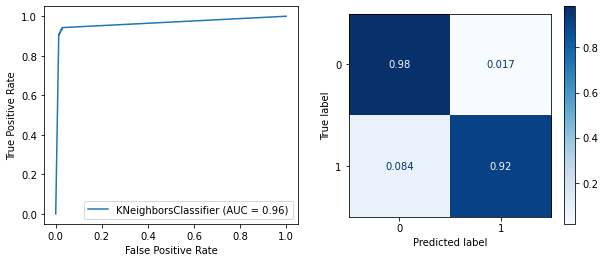

Recall training score: 1.0
Recall test score: 0.96808
Overfit by +0.03192
---------------
Recall score improvement: +0.39640999999999993


In [126]:
evaluate_model(knn_clf2, X_train_sel, X_test_sel, y_train_sm, y_test)

In [127]:
# Manhattan is the best metric, test out different k values and weights

knn_param_grid = {
    'n_neighbors': [2,3,4,5,6,7,8,9,10],
    'weights': ['distance'],
    'metric':['manhattan']}

In [128]:
knn_res2 = grid_search(knn_clf, knn_param_grid, X_train_sel, y_train_sm)

In [129]:
knn_res2['dataframe']

,param_metric,param_n_neighbors,param_weights,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,manhattan,2,distance,0.98426,0.99270,0.99213,0.98970,0.00385,1
1,manhattan,3,distance,0.98426,0.99157,0.98763,0.98782,0.00299,2
2,manhattan,4,distance,0.98201,0.99045,0.98820,0.98689,0.00357,3
3,manhattan,5,distance,0.97976,0.98989,0.98482,0.98482,0.00413,4
4,manhattan,6,distance,0.97976,0.98876,0.98426,0.98426,0.00367,5
6,manhattan,8,distance,0.97695,0.98764,0.98257,0.98239,0.00436,6
5,manhattan,7,distance,0.97639,0.98876,0.98201,0.98239,0.00506,7
7,manhattan,9,distance,0.97527,0.98652,0.98145,0.98108,0.00460,8
8,manhattan,10,distance,0.97527,0.98652,0.98033,0.98070,0.00460,9


- 2 seems to be the optimal number of neighbors
- **Model Considerations:** Tried feature selection and hyperparameter doing. Model is overfit by about 3%

### KNN Conclusions
- Overall, compared to the dummy, the KNN model performed very well on the training and test set
- In the dummy, the model detected fraud 52% of the time, in the final KNN model, it was able to accurately detect fraud 92% of the time, a 40% improvement
- Out of all valid transactions, it accurately predicted 98%
    - Of the 2% that are misclassified, the only harm is that the customer will receive a notification saying that the transaction they are initiating may be fraudulent
    - They can confirm or deny this and proceed to send the funds
- For fraudulant cases, the median of the average value sent in a transaction is 0.5 ETH. The 200 moving day average (the average price of ETH the past 200 days) is \$1,528
    - While there is no official number, BTC and ETH have clearly been the target of hacks and we shall say that 5% of all wallets will be hacked at some point in existance
    - If a wallet service has 10,000 users, it can expect 500 of them to experience some sort of fraud. Given that the median average value sent out per accounts that experience fraud is 0.5 ETH, these customers are losing \$764
    - The dummy model can predict fraud 50% of the time. So 250 people will experience fraud costing them \\$764 each for a total loss of \$191,000
    - Of course, this is bad business for the wallet company, the users are highly likely to transfer their funds to another wallet service after experiencing fraud
    - If the company were to use the KNN model that we have tuned, it would detect fraud 92% of the time
        - Out of the 500 customers who would hypothetically experience fraud, only 40 customers would experience fraud because the model would notify the customer before sending the suspicious transaction
        - 40 customers causes a total loss of $30,560
- **Conclusion**: Out of 10,000 customers, the company can expect that 500 of them will be targeted for fraud. Using the model, rather than 250 of them being impacted by fraud, only 30 of them will be
    - This reduces potential losses from \\$191,000 to \$30,560, an 84% decrease in costs
    - Additinally, 88% fewere customers will be affected by fraud
    - The average expected loss by fraud is reduced from \\$19.11 to \$3.05

## Random Forest Model
- Using the Random Forest model because it is more resistant to variance and outliers
- Ensemble method so in theory it should provide strong results
- Still interpretable and can provide conclusions

### Preprocessing Pipeline

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6871, 35)
(2945, 35)
(6871,)
(2945,)


Data does not need to be scaled and RandomForestClassifier object accepts a 'class weight' balance so will not need to use smote

In [131]:
# Pull out numeric columns
# Pull out categorical columns

num_cols = X_train.select_dtypes('number').columns.to_list()
cat_cols = X_train.select_dtypes('O').columns.tolist()

In [132]:
# Use median as default strategy

num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))])

In [133]:
# Create categorical imputer
# Do not need to drop because RF can handle multicollinearity

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

In [134]:
# Create column transformer to handle numeric and categorical columns

preprocessing=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])

In [135]:
# Fit transform training data
# Transform testing data

X_train_p = preprocessing.fit_transform(X_train)
X_test_p = preprocessing.transform(X_test)

In [136]:
def get_column_names(column_transformer, train_matrix, train_df, test_matrix, test_df):
    """
    Creates dataframes with columns from original training data
    Parameters: Train data matrix, train data dataframe, test data matrix, test dataframe
    Returns: 1 X_train dataframe with columns and 1 X_test dataframe with columns
    """
    feature_names = preprocessing.named_transformers_['cat'].\
                named_steps['encoder'].get_feature_names(cat_cols).tolist()
    X_cols = num_cols+feature_names
    X_train_df = pd.DataFrame(train_matrix,columns=X_cols,index=train_df.index)
    X_test_df = pd.DataFrame(test_matrix,columns=X_cols,index=test_df.index)
    return X_train_df, X_test_df

In [137]:
# Insert names into matrices and transform into DataFrame

X_train_ns, X_test_ns = get_column_names(preprocessing, X_train_p, X_train, X_test_p, X_test)

In [138]:
# Make sure columns appear

X_test_ns.head()

,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_diff_first_last,Sent_tnx,Received_Tnx,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,Total_tnx,total_Ether_sent,total_ether_received,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_rec_contract_addr,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,erc_missing,max_div_avg,weights_rec_large,weights_rec_mid,weights_rec_no,weights_rec_small,weights_rec_small_mid,weights_rec_ultra,weights_rec_unlisted,weights_sent_large,weights_sent_mid,weights_sent_no,weights_sent_small,weights_sent_small_mid,weights_sent_ultra,weights_sent_unlisted
7743,0.00000,339.31000,193813.48000,1.00000,31.00000,22.00000,1.00000,0.00010,3.68319,0.68185,21.13661,21.13661,21.13661,32.00000,21.13661,21.13747,0.00086,3.00000,1.33700,0.00000,0.00000,2.00000,3.00000,0.00000,1.33700,0.44567,0.00000,0.00000,0.00000,0.00000,3.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
3919,3.50000,3886.85000,7780.70000,2.00000,2.00000,2.00000,2.00000,0.00139,0.05035,0.02587,0.00092,0.04991,0.02542,4.00000,0.05083,0.05174,0.00091,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.96376,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
9339,0.00000,261.82000,23289.00000,1.00000,3.00000,3.00000,1.00000,0.50000,5.09150,2.25237,6.75625,6.75625,6.75625,4.00000,6.75625,6.75711,0.00086,1.00000,0.00000,100.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,100.00000,100.00000,100.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
3618,154.92000,0.00000,309.83000,2.00000,1.00000,1.00000,2.00000,101.00000,101.00000,101.00000,0.24441,100.75461,50.49951,3.00000,100.99902,101.00000,0.00098,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.99516,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
5863,0.00000,0.00000,1.57000,1.00000,1.00000,1.00000,1.00000,2.87901,2.87901,2.87901,2.87810,2.87810,2.87810,2.00000,2.87810,2.87901,0.00091,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000


In [139]:
# Make sure columns appear

X_train_ns.head()

,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_diff_first_last,Sent_tnx,Received_Tnx,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,Total_tnx,total_Ether_sent,total_ether_received,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_rec_contract_addr,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,erc_missing,max_div_avg,weights_rec_large,weights_rec_mid,weights_rec_no,weights_rec_small,weights_rec_small_mid,weights_rec_ultra,weights_rec_unlisted,weights_sent_large,weights_sent_mid,weights_sent_no,weights_sent_small,weights_sent_small_mid,weights_sent_ultra,weights_sent_unlisted
5584,161.45000,0.82000,324.53000,2.00000,2.00000,2.00000,2.00000,44.00989,56.99011,50.50000,25.00000,75.99897,50.49949,4.00000,100.99897,101.00000,0.00103,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.50495,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
3828,2222.71000,7491.53000,137398.70000,18.00000,13.00000,8.00000,14.00000,0.01272,2.91444,0.94896,0.01985,2.91402,0.68494,31.00000,12.32887,12.33652,0.00765,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.25444,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
3400,53.34000,823.96000,275042.98000,306.00000,314.00000,2.00000,3.00000,1.00099,20.50631,2.06217,1.00057,20.50589,2.11567,620.00000,647.39412,647.52266,0.12854,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.69240,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1952,0.00000,2151.61000,200099.62000,0.00000,93.00000,3.00000,0.00000,0.00000,0.67399,0.23920,0.00000,0.00000,0.00000,94.00000,0.00000,22.24573,22.24573,2.00000,0.62924,0.00000,0.00000,2.00000,2.00000,0.11398,0.51526,0.31462,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,2.10158,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
555,4790.91000,4690.94000,81145.63000,14.00000,3.00000,2.00000,7.00000,2.00000,3.60231,2.83377,0.00000,2.36000,0.70563,17.00000,9.87883,8.50131,-1.37752,11.00000,54.39596,2500.00000,4.00000,5.00000,6.00000,0.00000,48.34829,9.06599,0.00000,2500.00000,500.00000,2.00000,6.00000,0.00000,3.34452,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000


### Vanilla RFM

- Evaluate performance of Vanilla RFM to get a baseline how the model is performing

In [140]:
# Instantiate Vanilla RFM
# Fit the model

rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(X_train_ns, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Rather than using SMOTE to create synthetic observations, can you use RF built in class_weight metric

              precision    recall  f1-score   support

       valid       0.98      1.00      0.99      2299
       fraud       0.99      0.93      0.96       646

    accuracy                           0.98      2945
   macro avg       0.99      0.96      0.97      2945
weighted avg       0.98      0.98      0.98      2945



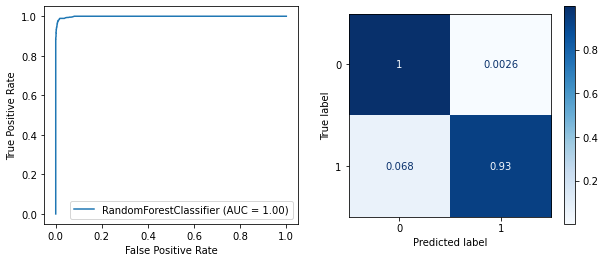

Recall training score: 1.0
Recall test score: 0.98302
Overfit by +0.01698
---------------
Recall score improvement: +0.41189


In [141]:
evaluate_model(rf_clf, X_train_ns, X_test_ns, y_train, y_test)

- The model had a recall on the fraud test data of 93%
    - Out of 100 fraudulent transactions, the model was able to accurately detect 93% of them
- The model is very slightly slightly overfit, about 1.5%
- Recall score moved up about 41% compared to the dummy variable
- Optimizing for Fraud Recall, because very high cost of false negatives
- AUC score is 1.0 which is the maximum score
- Vanilla RFM is already performing as well as the top KNN model
- **Next Steps:** Use Feature Selection to try and optimize recall score 

### RFM Feature Selection

<AxesSubplot:>

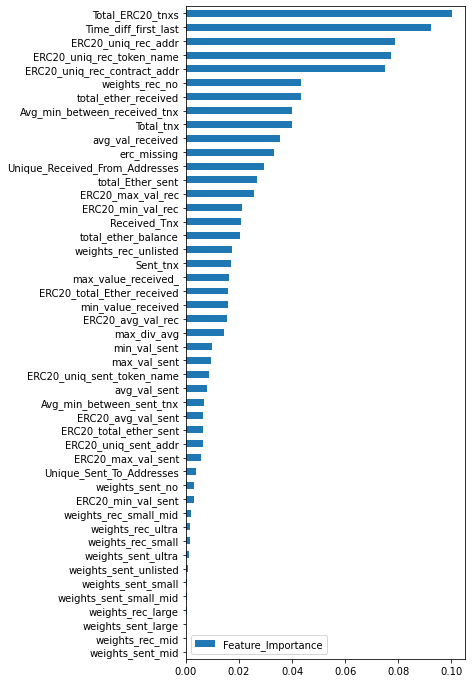

In [142]:
# Plot feature importance
# Reference: https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train_ns.columns).to_frame()
feat_importances = feat_importances.rename(columns={0:'Feature_Importance'})
feat_importances.sort_values(by='Feature_Importance',ascending=True).plot(kind='barh', figsize=(5,12))

- Feature important tells us how important a variable is for predicting a target
- The maximum feature importance is 0.10
- Total_ERC_20_tnxs, time_diff_first_last, ERC20_uniq_rec_token_name, ERC20_uniq_rec_contract_address
- After ERC20_uniq_rec_contract_address the feature importance dips from aprox 0.08 to aprox 0.04
- Keeping OHE columns because they tend to have a downward bias in feature importance due to their low cardinality

Source: https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

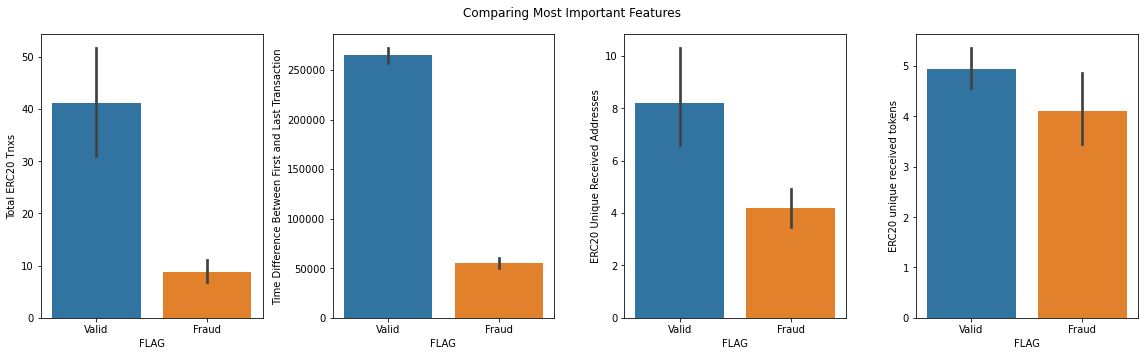

In [143]:
# Evaluate how the most important features compare in fraudent vs valid wallet transactions

fig, axes = plt.subplots(ncols=4, figsize=(16,5))

fig.suptitle('Comparing Most Important Features')

sns.barplot(data=df, x='FLAG', y='Total_ERC20_tnxs', ax=axes[0])
axes[0].set_xticklabels(['Valid', 'Fraud'])
axes[0].set_ylabel('Total ERC20 Tnxs')

sns.barplot(data=df, x='FLAG', y='Time_diff_first_last', ax=axes[1])
axes[1].set_xticklabels(['Valid', 'Fraud'])
axes[1].set_ylabel('Time Difference Between First and Last Transaction')

sns.barplot(data=df, x='FLAG', y='ERC20_uniq_rec_addr', ax=axes[2])
axes[2].set_xticklabels(['Valid', 'Fraud'])
axes[2].set_ylabel('ERC20 Unique Received Addresses')

sns.barplot(data=df, x='FLAG', y='ERC20_uniq_rec_token_name', ax=axes[3])
axes[3].set_xticklabels(['Valid', 'Fraud'])
axes[3].set_ylabel('ERC20 unique received tokens')


fig.tight_layout()

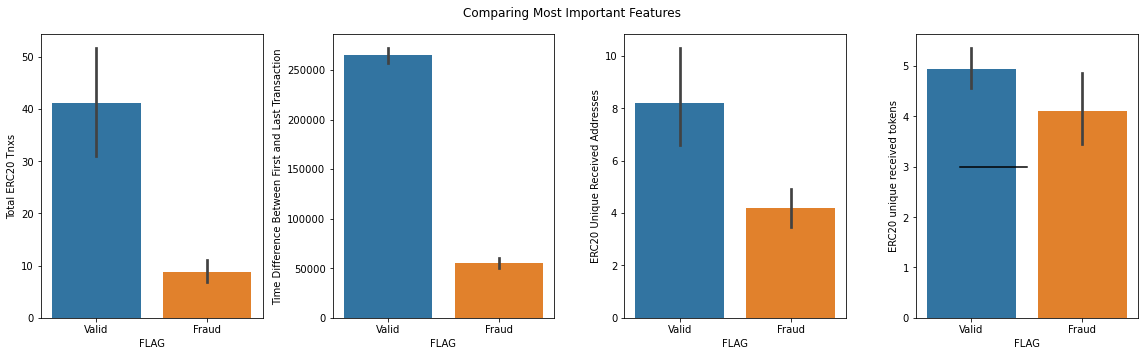

In [144]:
ax=axes[3] 
ax.axhline(3, xmin=0.2, xmax=0.5, color='k')
fig

- Total ERC20 Tnxs: As we can see, the mean for total ERC20 tnxs is about 4x higher for valid versus fraudulent wallets
- Time difference between first and last transaction: On average, valid transactions have about a 5x higher time difference between first and last transactions
    - Equates to about 150 days to 30 days
- ERC20 Unique Received Addresses: About 2x as high for valid versus fraudulent wallets
- ERC20 Unique Received Tokens: Roughly the same, valid is slightly higher
- Overall, interesting to note that many of the top features for model classification are regarding ERC20 transactions as opposed to standard Ethereum

In [145]:
# Fit permuation_importance to see which features have the highest affect on recall

from sklearn.inspection import permutation_importance
r = permutation_importance(rf_clf, X_test_ns, y_test, scoring='recall', n_repeats=5, random_state=42)

In [146]:
# Turn values into DataFrame so we can plot it

importance_df = pd.Series(r['importances_mean'], index=X_test_ns.columns).to_frame()
importance_df = importance_df.rename(columns={0:'PI Mean'})
importance_df.sort_values(by='PI Mean', ascending=False)

,PI Mean
Unique_Received_From_Addresses,0.03189
Time_diff_first_last,0.01517
Total_ERC20_tnxs,0.01517
ERC20_uniq_rec_contract_addr,0.01053
ERC20_uniq_rec_addr,0.01022
ERC20_uniq_rec_token_name,0.00743
Avg_min_between_received_tnx,0.00712
avg_val_received,0.00372
total_ether_received,0.00279
Received_Tnx,0.00248


In [147]:
# Merge feature importance with Permutation Importance

importance_df = importance_df.reset_index(drop=True)
feat_importances = feat_importances.reset_index(drop=True)
df_importance = pd.concat([importance_df, feat_importances],axis=1)

In [148]:
# Add indices

df_importance=df_importance.set_index(X_train_ns.columns)
df_importance.head()
df_importance.reset_index()


,index,PI Mean,Feature_Importance
0,Avg_min_between_sent_tnx,-0.00031,0.00681
1,Avg_min_between_received_tnx,0.00712,0.03998
2,Time_diff_first_last,0.01517,0.09219
3,Sent_tnx,-0.00062,0.01704
4,Received_Tnx,0.00248,0.02074
5,Unique_Received_From_Addresses,0.03189,0.02949
6,Unique_Sent_To_Addresses,0.00031,0.00381
7,min_value_received,0.00186,0.01567
8,max_value_received_,-0.00093,0.01629
9,avg_val_received,0.00372,0.03562


In [149]:
df_melted = pd.melt(df_importance.reset_index(), value_vars=['PI Mean', 'Feature_Importance'], id_vars=['index'])

In [150]:
ordered_list=df_importance.sort_values(by='Feature_Importance', ascending=False).index.to_list()

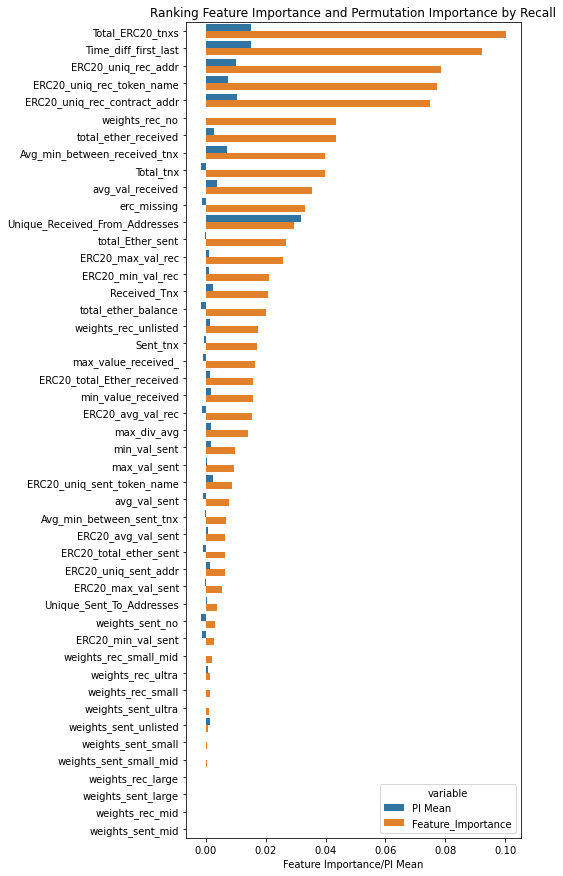

In [151]:
fig, ax = plt.subplots(figsize=(6,15))
sns.barplot(data=df_melted, y='index', x='value', hue='variable', orient='h', order=ordered_list)
ax.set_ylabel('')
ax.set_xlabel('Feature Importance/PI Mean')
plt.title('Ranking Feature Importance and Permutation Importance by Recall');

- The top columns in feature selection are also the top columns for Permutation Importance when focusing on recall
- Unique received from address has the most disparity between importance levels
- A few of the features have a negative impact on recall
- In general, the magnitude of PI is much lower than the RF Feature Importance
- Out of 47 columns, will try dropping 20% and see if my model has a major difference in performance
    - Equates to 10 columns
    - Compare score before and after drop

In [152]:
# Drop 10 lowest feature importance columns

cols_to_drop = list(df_importance.iloc[-10:].index)
cols_to_drop

['weights_rec_small_mid',
 'weights_rec_ultra',
 'weights_rec_unlisted',
 'weights_sent_large',
 'weights_sent_mid',
 'weights_sent_no',
 'weights_sent_small',
 'weights_sent_small_mid',
 'weights_sent_ultra',
 'weights_sent_unlisted']

In [153]:
# Remove columns from feature selection

X_train_fil = X_train_ns.drop(cols_to_drop, axis=1)
X_test_fil = X_test_ns.drop(cols_to_drop, axis=1)

In [154]:
# Confirm columns are being removed

print(X_train_fil.shape)
X_test_fil.shape

(6871, 37)


(2945, 37)

              precision    recall  f1-score   support

       valid       0.98      1.00      0.99      2299
       fraud       0.99      0.94      0.96       646

    accuracy                           0.98      2945
   macro avg       0.98      0.97      0.98      2945
weighted avg       0.98      0.98      0.98      2945



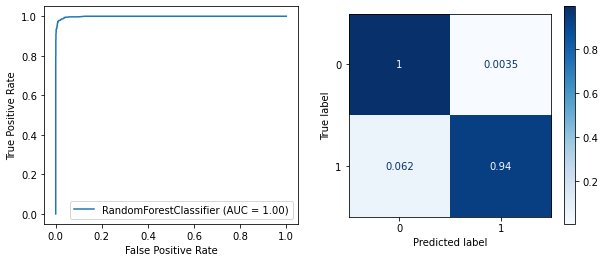

Recall training score: 1.0
Recall test score: 0.9837
Overfit by +0.0163
---------------
Recall score improvement: +0.41808


In [155]:
# Evaluate model with selected features removed

rf_clf.fit(X_train_fil, y_train)
evaluate_model(rf_clf, X_train_fil, X_test_fil, y_train, y_test)

- Recall score on the testing data has improved to 94%, this is the metric we are trying to optimize
- Vanilla test recall on the fraud column was at 93%
- Removing columns improved the score
- These columns may have negatively impacted recall score
- Additionally, with less columns, we are improving efficiency

### RFM Tuning

- Use estimators to retrieve vanilla baseline
- Use GridSearch CV to optimize for recall
- Iterate this process until optimal model is found

In [156]:
# [estimator.tree_.max_depth for estimator in rf_clf.estimators_]
# [estimator.tree_.max_features for estimator in rf_clf.estimators_]

In [157]:
# rf_clf.estimators_.tree_

In [158]:
# cols = list(rf_clf.estimator_params)
# cols

In [159]:
# estimator_dict = {}
# for col in cols:
#     estimator_dict[col] = [estimator.tree_.col for estimator in rf_clf.estimators_]
# estimator_dict

In [160]:
# Set up parameter grid
# Include default and several other options
# Only use balanced to account for class weight imbalance

rf_param_grid = {
    'n_estimators': [80,100,120],
    'criterion': ['gini', 'entropy'],
    'max_depth':[10,15,20],
    'min_samples_leaf':[1,2,5,10],
    'class_weight':['balanced']}

In [161]:
# Run grid search

rf_grid = grid_search(rf_clf, rf_param_grid, X_train_fil, y_train)

In [162]:
rf_grid['best_params']

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'n_estimators': 120}

In [163]:
# Observe Top 10 Ranked Hyperparameters

df_rf_grid = rf_grid['dataframe']
df_rf_grid[df_rf_grid['rank_test_score']<=11]

,param_class_weight,param_criterion,param_max_depth,param_min_samples_leaf,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
57,balanced,entropy,15,10,80,0.95108,0.95303,0.94521,0.94977,0.00333,1
69,balanced,entropy,20,10,80,0.95108,0.95303,0.94521,0.94977,0.00333,1
47,balanced,entropy,10,10,120,0.94716,0.95499,0.94716,0.94977,0.00369,1
42,balanced,entropy,10,5,80,0.95108,0.95108,0.94325,0.94847,0.00369,4
66,balanced,entropy,20,5,80,0.95108,0.94912,0.94521,0.94847,0.00244,4
70,balanced,entropy,20,10,100,0.94716,0.95108,0.94521,0.94781,0.00244,6
58,balanced,entropy,15,10,100,0.94716,0.95108,0.94521,0.94781,0.00244,6
34,balanced,gini,20,10,100,0.95303,0.95108,0.93933,0.94781,0.00605,6
22,balanced,gini,15,10,100,0.95303,0.95108,0.93933,0.94781,0.00605,6
33,balanced,gini,20,10,80,0.95108,0.95108,0.93933,0.94716,0.00554,10


- Class weight: Balanced
- Criterion: entropy
- Max Depth: explore further
- Min Sample Leaf: explore further
- N_estimators: explore further

In [164]:
# Fit model with results from GridSearch

rf2_clf = RandomForestClassifier(n_estimators=80,class_weight='balanced', criterion='entropy', max_depth=10, min_samples_leaf=5)

              precision    recall  f1-score   support

       valid       0.99      0.99      0.99      2299
       fraud       0.97      0.96      0.96       646

    accuracy                           0.98      2945
   macro avg       0.98      0.97      0.98      2945
weighted avg       0.98      0.98      0.98      2945



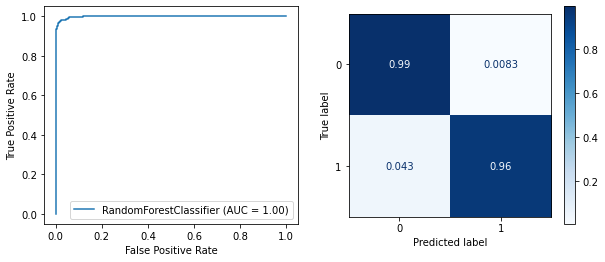

Recall training score: 0.99462
Recall test score: 0.98404
Overfit by +0.01058
---------------
Recall score improvement: +0.43665999999999994


In [165]:
# Fit and evaluate new model performance

rf2_clf.fit(X_train_fil, y_train)
evaluate_model(rf2_clf, X_train_fil, X_test_fil, y_train, y_test)

- Recall score improved from 0.94 to 0.95
- It also appears less overfit
- **Next:** Try another grid search using results from first search

In [166]:
# Set up parameter grid

rf_param_grid2 = {
    'n_estimators': [70, 80,120, 130],
    'criterion': ['entropy'],
    'max_depth':[15,20, 25],
    'min_samples_leaf':[4,5,6],
    'class_weight':['balanced']}

- Some of the initial GridSearch results were close to the tails of the distribution so trying a new parameter grid with more extreme values

In [167]:
# Fit the GridSearch

rf_grid2 = grid_search(rf2_clf, rf_param_grid2, X_train_fil, y_train)

In [168]:
# Observe results

df_rf_grid2 = rf_grid2['dataframe']
df_rf_grid2[df_rf_grid2['rank_test_score']<=11]

,param_class_weight,param_criterion,param_max_depth,param_min_samples_leaf,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
21,balanced,entropy,20,6,80,0.94716,0.95108,0.94716,0.94847,0.00185,1
35,balanced,entropy,25,6,130,0.94129,0.95108,0.95108,0.94781,0.00461,2
20,balanced,entropy,20,6,70,0.94325,0.94912,0.95108,0.94781,0.00333,2
29,balanced,entropy,25,5,80,0.94521,0.95108,0.94716,0.94781,0.00244,2
5,balanced,entropy,15,5,80,0.94325,0.94716,0.95108,0.94716,0.00320,5
8,balanced,entropy,15,6,70,0.95108,0.94716,0.94325,0.94716,0.00320,6
22,balanced,entropy,20,6,120,0.94521,0.95303,0.94129,0.94651,0.00488,7
4,balanced,entropy,15,5,70,0.94912,0.94325,0.94716,0.94651,0.00244,7
16,balanced,entropy,20,5,70,0.94129,0.95108,0.94716,0.94651,0.00402,7
2,balanced,entropy,15,4,120,0.94716,0.94521,0.94521,0.94586,0.00092,10


- Mean test score higher than first param grid
- N_estimators is still optimized on the end of the distribution will try another search with lower n_estimators
- Min samples leaf is optimzed at the end of the distribution so will try some higher values
- Max depth is centered so I believe it is close to the optimal value
- **Next:** Run GridSearch with new parameters

In [169]:
rf_grid2['best_params']

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 6,
 'n_estimators': 80}

In [170]:
rf3_clf = RandomForestClassifier(class_weight='balanced',criterion= 'entropy', max_depth=25,\
                                min_samples_leaf= 6, n_estimators= 80, random_state=42)

              precision    recall  f1-score   support

       valid       0.99      0.99      0.99      2299
       fraud       0.97      0.96      0.97       646

    accuracy                           0.99      2945
   macro avg       0.98      0.98      0.98      2945
weighted avg       0.99      0.99      0.99      2945



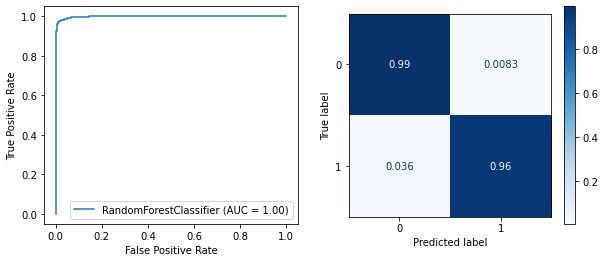

Recall training score: 0.9952
Recall test score: 0.98574
Overfit by +0.00946
---------------
Recall score improvement: +0.4444


In [171]:
rf3_clf.fit(X_train_fil, y_train)
evaluate_model(rf3_clf, X_train_fil, X_test_fil, y_train, y_test)

- Score is continuing to improve
- Recall has gone from 0.95 on the test data to 0.96
- AUC curve is still at max value of 1.0

In [172]:
# Set up new parameter grid based on findings from previous grid

rf_param_grid3 = {
    'n_estimators': [55, 60,65, 70],
    'criterion': ['entropy'],
    'max_depth':[18,20, 22],
    'min_samples_leaf':[6,7,8,9],
    'class_weight':['balanced']}

In [173]:
rf_grid3 = grid_search(rf3_clf, rf_param_grid3, X_train_fil, y_train)

In [174]:
# Observe results

df_rf_grid3 = rf_grid2['dataframe']
df_rf_grid3[df_rf_grid2['rank_test_score']<=11]

,param_class_weight,param_criterion,param_max_depth,param_min_samples_leaf,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
21,balanced,entropy,20,6,80,0.94716,0.95108,0.94716,0.94847,0.00185,1
35,balanced,entropy,25,6,130,0.94129,0.95108,0.95108,0.94781,0.00461,2
20,balanced,entropy,20,6,70,0.94325,0.94912,0.95108,0.94781,0.00333,2
29,balanced,entropy,25,5,80,0.94521,0.95108,0.94716,0.94781,0.00244,2
5,balanced,entropy,15,5,80,0.94325,0.94716,0.95108,0.94716,0.00320,5
8,balanced,entropy,15,6,70,0.95108,0.94716,0.94325,0.94716,0.00320,6
22,balanced,entropy,20,6,120,0.94521,0.95303,0.94129,0.94651,0.00488,7
4,balanced,entropy,15,5,70,0.94912,0.94325,0.94716,0.94651,0.00244,7
16,balanced,entropy,20,5,70,0.94129,0.95108,0.94716,0.94651,0.00402,7
2,balanced,entropy,15,4,120,0.94716,0.94521,0.94521,0.94586,0.00092,10


In [175]:
rf_grid3['best_params']

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_leaf': 9,
 'n_estimators': 55}

In [176]:
rf4_clf = RandomForestClassifier(class_weight='balanced',criterion= 'entropy', max_depth=18,\
                                min_samples_leaf= 9, n_estimators= 55, random_state=42)

              precision    recall  f1-score   support

       valid       0.99      0.99      0.99      2299
       fraud       0.96      0.96      0.96       646

    accuracy                           0.98      2945
   macro avg       0.97      0.98      0.97      2945
weighted avg       0.98      0.98      0.98      2945



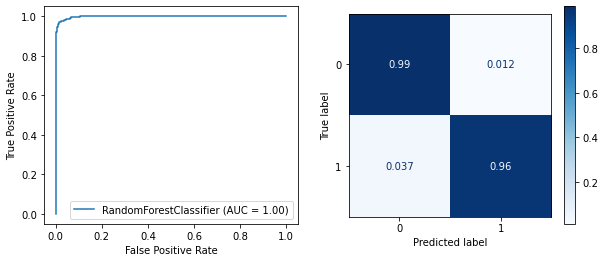

Recall training score: 0.99185
Recall test score: 0.98234
Overfit by +0.00951
---------------
Recall score improvement: +0.44284999999999997


In [177]:
rf4_clf.fit(X_train_fil, y_train)
evaluate_model(rf4_clf, X_train_fil, X_test_fil, y_train, y_test)

- Recall score for fraudulent cases decreased so will work with the third iteration of the Random Forest

### Imputation Strategies

- Observe how different imputation strategies impact recall score
- Will only need numeric columns because categorical columns have already been one hot encoded

In [178]:
# Create list of numeric columsn

# num_cols2 = X_train_fil.select_dtypes('number').columns.to_list()
# num_cols2

Don't need categorical columns because they have already been one hot encoded

In [179]:
# Set up baseline imputer with strategy set to median

# num_transformer2 = Pipeline(steps=[
#     ('imputer',SimpleImputer(strategy='median')),
#     ('scale',StandardScaler())])

In [180]:
# Add it to the column transformer

# preprocessor2=ColumnTransformer(transformers=[
#     ('num',num_transformer, num_cols)])

In [181]:
scaled_preprocessing.named_transformers_

{'num': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('scale', StandardScaler())]),
 'cat': Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                 ('encoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))])}

In [182]:
# Create pipeline and add our best model for assessing scores

grid_pipe2 = Pipeline(steps=[('ct',scaled_preprocessing),
                  ('clf',RandomForestClassifier(class_weight='balanced',criterion= 'entropy', max_depth=25,\
                                min_samples_leaf= 6, n_estimators= 80))])

In [183]:
# Fit the pipeline to our training data

# grid_pipe2.fit(X_train,y_train)

In [184]:
# Set up parameter grid

'n_estimators': [80,100,120],
    'criterion': ['gini', 'entropy'],
    'max_depth':[10,15,20],
    'min_samples_leaf':[1,2,5,10],
    'class_weight':['balanced']}

SyntaxError: invalid syntax (<ipython-input-184-bb75c91fac8a>, line 3)

In [ ]:
# Set up SimpleImputer with different types of imputation strategies

params2 = {'ct__num__imputer__strategy':['median','mean','most_frequent'],
          'clf__n_estimators': [80,100,120],
            'clf__criterion': ['gini', 'entropy'],
            'clf__max_depth':[10,15,20, None],
            'clf__min_samples_leaf':[1,2,5,10],
            'clf__class_weight':['balanced']}

- Not using a constant value because it will make a larger difference on the distribution of data
- Attempting to optimize scores while also providing interpretable results

In [ ]:
# Set up grid search and optimize for recall score
# Fit the grid search on training data

# Takes 30 mins to run so saved the results as a DataFrame in the repo

# gridsearch2 = GridSearchCV(grid_pipe2,params2, cv=5, scoring='recall')
# gridsearch2.fit(X_train,y_train)

In [ ]:
# Turn results into DataFrame
# Safe in repo to make it easier to produce

grid_search_df2 = pd.DataFrame(gridsearch2.cv_results_)
grid_search_df2.to_csv('gridsearch2df')

- According to the DataFrame, median performed the best on the cross validaded training data
- Followed by most frequent and then mean
- Median was the original imputation method
- Most frequent had the lowest standard deviation but all of the results fell within a very tight range
- **Conclusion:** Continue to use median as imputation method for missing values

In [ ]:
grid_search_df2 = pd.read_csv('gridsearch2df')

In [ ]:
grid_search_df2.sort_values(by='rank_test_score')

- Given the different results, median seems to be the most effective imputer method
- Mean test score is very similar to the results from tuning the RF model

In [ ]:
# Instantiate model using results from DataFrame
# Fit model

rf5_clf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=None, \
                                 min_samples_leaf=10, n_estimators=120)
rf5_clf.fit(X_train_fil, y_train)

In [ ]:
# Check performance

evaluate_model(rf5_clf, X_train_fil, X_test_fil, y_train, y_test)

- Performance has improved to 0.97 on the test case
- Essentially not overfit at all from a macro avg recall perspective
- Out of 100 fraud cases, the model will accurately detect 97% of them
- **This is the final model for deployment**

### RFM Conclusion

# iNTERPRET

In [ ]:
# conda install -c conda-forge shap

In [ ]:
import shap 
print(shap.__version__)
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(rf5_clf)

## Calculaate shap values for test data
shap_values = explainer.shap_values(X_test_fil,y_test)
len(shap_values)

In [ ]:
shap.summary_plot(shap_values[1],X_train_fil,plot_type='bar')

In [ ]:
shap.summary_plot(shap_values, X_train_fil)

In [ ]:
shap.summary_plot(shap_values[1],X_test_fil,max_display=40)

- Total ERC20_tnx, ERC20_unique_rec_token_name, ERC20_unique_rec_address are kind of difficult to tell which direction they are moving the prediction based on the SHAP Model
    - From EDA, it appears that higher values in each category result in valid transactions
        - The more active the user is in transactions, and receiving a variety of coins the less liklihood that the wallet user will experience fraud
        - While this may seem counter intuitive, more sophisticated users who use their wallets more often may be better prone to identifying scams and fraudulent activity
- Time_diff_first_and_last tend to be associated with mixed values
    - Low values seem to be more correlated with fraud
- If ERC values are missing, there is a very liklihood of fraud
    - Makes sense because the user may not know what transactions transpired in their wallet
- If a user does use ERC20 tokens, they are less likely to experience fraud
    - This is very surpising considering many ERC20 tokens are associated with fraud
- Higher the total ether balance, less likely to report fraud
    - Wallets with higher balances may be more heavily targeted but they the owners may be more vigilant

In [ ]:
# !pip install lime
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
lime_explainer =LimeTabularExplainer(
    training_data=np.array(X_test_fil),
    feature_names=X_test_fil.columns,
    class_names=['Valid', 'Fraud'],
    mode='classification'
)

In [ ]:
row = np.random.choice(range(len(X_test_fil)))
exp = lime_explainer.explain_instance(X_test_fil.iloc[row], rf3_clf.predict_proba)
exp.show_in_notebook(show_table=True)

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.